# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Salaries of Data Scientists</p>
</br>
<p>
In 2012, Data Scientist was <a href="https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century" target="_blank" rel="noopener">proclaimed</a> "the sexiest job of the 21st century". The growth rate of this occupation is <a href="https://www.bls.gov/ooh/fastest-growing.htm" target="_blank" rel="noopener">estimated</a> to reach 35% between 2021 and 2031. But despite the honeymoon that DS field is experiencing, it is important to note that data science salaries can range considerably across professionals. Employers consider several factors when deciding how much to pay, including experience, skills, job title, or company size. Let's take a closer look at the salaries of the people who take messy, unstructured data and use it to tell a story, whether verbally, visually, or —ideally— both.
</p>
<p>
Salary expectations are always a key factor when looking for new job opportunities, and the good news is that data scientists, as well as other data-related jobs, command some of the highest salaries in the tech industry.
</p>    
<p>
In this context, we are going to perform some Exploratory Data Analysis on a dataset containing info on jobs related to Data Science, from 2020 to 2024. Afterwards, we are going to train and fine-tune a Machine Learning model that is able to predict a person's salary according to the relevant attributes.</p>
</br>
</p>
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
</br>

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#1c1c1c"> Importing Libraries</font>](#1)                   |9   | [<font color="#1c1c1c"> Employee's Origins</font>](#9)                 |
|2   | [<font color="#1c1c1c"> About Dataset</font>](#2)                         |10   | [<font color="#1c1c1c"> Salary</font>](#10)   |     
|3   | [<font color="#1c1c1c"> Basic Exploration</font>](#3)                     |11  | [<font color="#1c1c1c"> Experience Level</font>](#11)|
|4   | [<font color="#1c1c1c"> Dataset Summary</font>](#4)                       |12  | [<font color="#1c1c1c"> Employment Type</font>](#12)   |       
|5   | [<font color="#1c1c1c"> Data Preprocessing</font>](#5)      |13  | [<font color="#1c1c1c"> Company Size</font>](#13)    |     
|6   | [<font color="#1c1c1c"> Custom Palette For Visualization</font>](#6)              |14  | [<font color="#1c1c1c"> Remote Job</font>](#14)  |     
|7   | [<font color="#1c1c1c"> Top Data Science Job</font>](#7)              |15  | [<font color="#1c1c1c"> Correlation Map</font>](#15)  |    
|8   | [<font color="#1c1c1c"> Company's Origins</font>](#8)              |16  | [<font color="#1c1c1c"> Thank You</font>](#16)  | 
   

<a id="1"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
#%pip install country_converter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import country_converter as coco

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os
from pathlib import Path

<a id="2"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

The <a href="https://aijobs.net/salaries/download/">dataset</a> contains a table with all salary information structured as follows:
* **work_year:** The year the salary was paid.
* **experience_level:** The experience level in the job during the year with the following possible values:
    - EN - Entry-level / Junior
    - MI - Mid-level / Intermediate
    - SE - Senior-level / Expert
    - EX - Executive-level / Director
* **employment_type:** The type of employement for the role:
    - PT - Part-time
    - FT - Full-time
    - CT - Contract
    - FL - Freelance
* **job_title:** The role worked in during the year.
* **salary:** The total gross salary amount paid.
* **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the <a href="https://www.bis.org/statistics/">BIS and central banks</a>.
* **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
    - 0 - No remote work (less than 20%)
    - 50 - Partially remote / hybird
    - 100 - Fully remote (more than 80%)
* **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size:** The average number of people that worked for the company during the year:
    - S - less than 50 employees (small)
    - M - 50 to 250 employees (medium)
    - L - more than 250 employees (large)

In [3]:
# Create relative path
CWD = os.path.abspath('')

def get_data(ds_type: str) -> pd.DataFrame: # ds_type = 'train' or 'test'
    path = Path(CWD).parent / f'ds_salary_prediction/data/{ds_type}.csv'
    return pd.read_csv(path)

In [4]:
# Load the training data
data = get_data('salaries')

<a id="3"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [5]:
data.reset_index(inplace=True)
data.rename(columns={'index': 'index_column'}, inplace=True)

In [6]:
print(f"Shape Of The Dataset: {data.shape}")
print("\nGlimpse Of The Dataset:")
data.head().style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})


Shape Of The Dataset: (68182, 12)

Glimpse Of The Dataset:


,index_column,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2024,SE,FT,Data Analyst,99200,USD,99200,US,0,US,M
1,1,2024,SE,FT,Data Analyst,69400,USD,69400,US,0,US,M
2,2,2024,EN,FT,Data Analyst,78000,USD,78000,US,0,US,M
3,3,2024,EN,FT,Data Analyst,52000,USD,52000,US,0,US,M
4,4,2024,EN,FT,Data Analyst,133900,USD,133900,US,0,US,M


In [7]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68182 entries, 0 to 68181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index_column        68182 non-null  int64 
 1   work_year           68182 non-null  int64 
 2   experience_level    68182 non-null  object
 3   employment_type     68182 non-null  object
 4   job_title           68182 non-null  object
 5   salary              68182 non-null  int64 
 6   salary_currency     68182 non-null  object
 7   salary_in_usd       68182 non-null  int64 
 8   employee_residence  68182 non-null  object
 9   remote_ratio        68182 non-null  int64 
 10  company_location    68182 non-null  object
 11  company_size        68182 non-null  object
dtypes: int64(5), object(7)
memory usage: 6.2+ MB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [8]:
print(f"Summary of numeric columns:")
data.describe().style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})

Summary of numeric columns:


,index_column,work_year,salary,salary_in_usd,remote_ratio
count,68182.000000,68182.000000,68182.000000,68182.000000,68182.000000
mean,34090.500000,2023.812355,163188.522587,158433.940351,21.801942
std,19682.592364,0.483203,197562.146108,72141.470523,41.166747
min,0.000000,2020.000000,14000.000000,15000.000000,0.000000
25%,17045.250000,2024.000000,108000.000000,108000.000000,0.000000
50%,34090.500000,2024.000000,148300.000000,148000.000000,0.000000
75%,51135.750000,2024.000000,200000.000000,200000.000000,0.000000
max,68181.000000,2024.000000,30400000.000000,800000.000000,100.000000


In [9]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})

,count,unique,top,freq
experience_level,68182,4,SE,40105
employment_type,68182,4,FT,67883
job_title,68182,280,Data Scientist,10916
salary_currency,68182,25,USD,64767
employee_residence,68182,92,US,61574
company_location,68182,85,US,61627
company_size,68182,3,M,65710


In [10]:
#Count the number of missing values in each column
print(f"Number of missing values in each column:")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})

Number of missing values in each column:


,index_column,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,0,0,0,0,0,0,0,0,0,0,0


**Conclusions:**

* There are no missing values.
* We need to convert ISO country code to country name.
* We need to encode categorical variables in the later stage of data preprocessing.

<a id="5"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [11]:
# Check column names
print("Columns in the dataset:", data.columns)

# Convert Country Codes to Names
data["employee_residence"] = coco.convert(names=data["employee_residence"], to="name")
data["company_location"] = coco.convert(names=data["company_location"], to="name")

# Replace Abbreviations with Full Descriptions
data["experience_level"].replace({"EN":"Entry Level","MI":"Mid Level","EX":"Expert Level","SE":"Senior Level"},inplace=True)
data["employment_type"].replace({"PT":"Part Time","FT":"Full Time","CT":"Contractual","FL":"Freelance"},inplace=True)
data["company_size"].replace({"M":"Medium","L":"Large","S":"Small"},inplace=True)
data["remote_ratio"].replace({100:"Fully Remote",0:"Non Remote Work",50:"Partially Remote"},inplace=True)

# Drop Unnecessary Columns
data.drop(["salary_currency","salary"], axis=1, inplace=True)

Columns in the dataset: Index(['index_column', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [12]:
print("Let's look at the final dataset after preprocessing:")
data.head().style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})

Let's look at the final dataset after preprocessing:


,index_column,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2024,Senior Level,Full Time,Data Analyst,99200,United States,Non Remote Work,United States,Medium
1,1,2024,Senior Level,Full Time,Data Analyst,69400,United States,Non Remote Work,United States,Medium
2,2,2024,Entry Level,Full Time,Data Analyst,78000,United States,Non Remote Work,United States,Medium
3,3,2024,Entry Level,Full Time,Data Analyst,52000,United States,Non Remote Work,United States,Medium
4,4,2024,Entry Level,Full Time,Data Analyst,133900,United States,Non Remote Work,United States,Medium


In [13]:
print(f"Summary of numeric columns after preprocessing:")
data.describe().style.set_properties(**{"background-color": "#d6e8ff","color":"black","border": "1.5px solid black"})

Summary of numeric columns after preprocessing:


,index_column,work_year,salary_in_usd
count,68182.000000,68182.000000,68182.000000
mean,34090.500000,2023.812355,158433.940351
std,19682.592364,0.483203,72141.470523
min,0.000000,2020.000000,15000.000000
25%,17045.250000,2024.000000,108000.000000
50%,34090.500000,2024.000000,148000.000000
75%,51135.750000,2024.000000,200000.000000
max,68181.000000,2024.000000,800000.000000


In [14]:
print(f"Summary of categorical columns after preprocessing:")
data.describe(include=object).T.style.set_properties(**{"background-color": "#d6e8ff","border": "1.5px solid black"})

Summary of categorical columns after preprocessing:


,count,unique,top,freq
experience_level,68182,4,Senior Level,40105
employment_type,68182,4,Full Time,67883
job_title,68182,280,Data Scientist,10916
employee_residence,68182,92,United States,61574
remote_ratio,68182,3,Non Remote Work,53178
company_location,68182,85,United States,61627
company_size,68182,3,Medium,65710


<a id="6"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [15]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#d6e8ff","figure.facecolor":"#d6e8ff"})
sns.set_context("poster",font_scale = .7)

palette = ["#3d57ff","#6c52f9","#8b4df1","#a447e8","#b942df","#ca3ed5","#d93bca","#e53ac0","#f03db5","#f841ab","#ff48a1"]
palette_cmap=["#CC0028","#ef3f28","#f36b3b","#faa96e","#FEE08B","#fcdcb0","#6faea4","#008b99","#026e90","#00507A","#11264e"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

<a id="7"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Top Data Science Job</p>

Frequency of job titles (out of 68182 individuals):


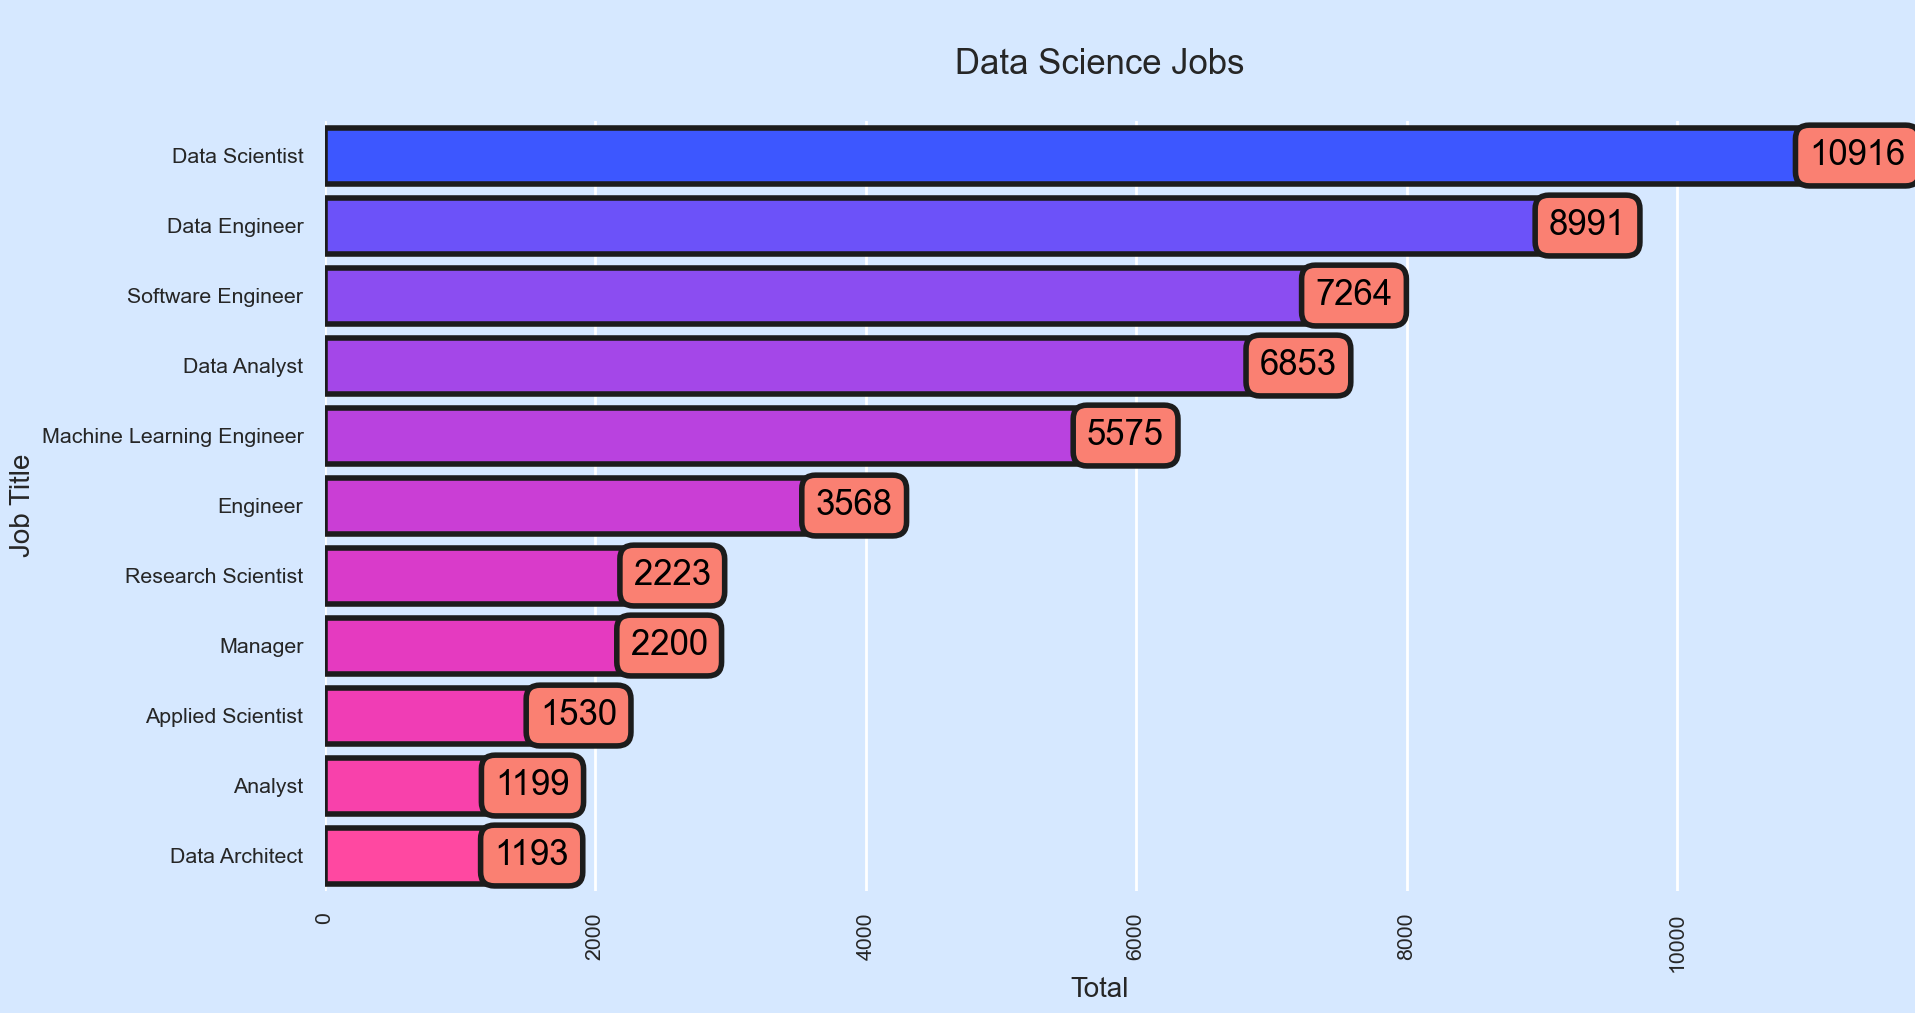

In [16]:
print("Frequency of job titles (out of 68182 individuals):")
plt.subplots(figsize=(20, 10))
p=sns.countplot(y=data["job_title"],order=data["job_title"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Jobs\n",fontsize=25)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Conclusions:**

* **Data Scientist**, **Data Engineer** and **Data Analyst** are the most frequent job titles in the dataset.


<a id="8"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Location of the Employer</p>

Let's have a look at the locations of the comapnies which data scientists listed as their employers (85 unique country names, 68182 total observations):


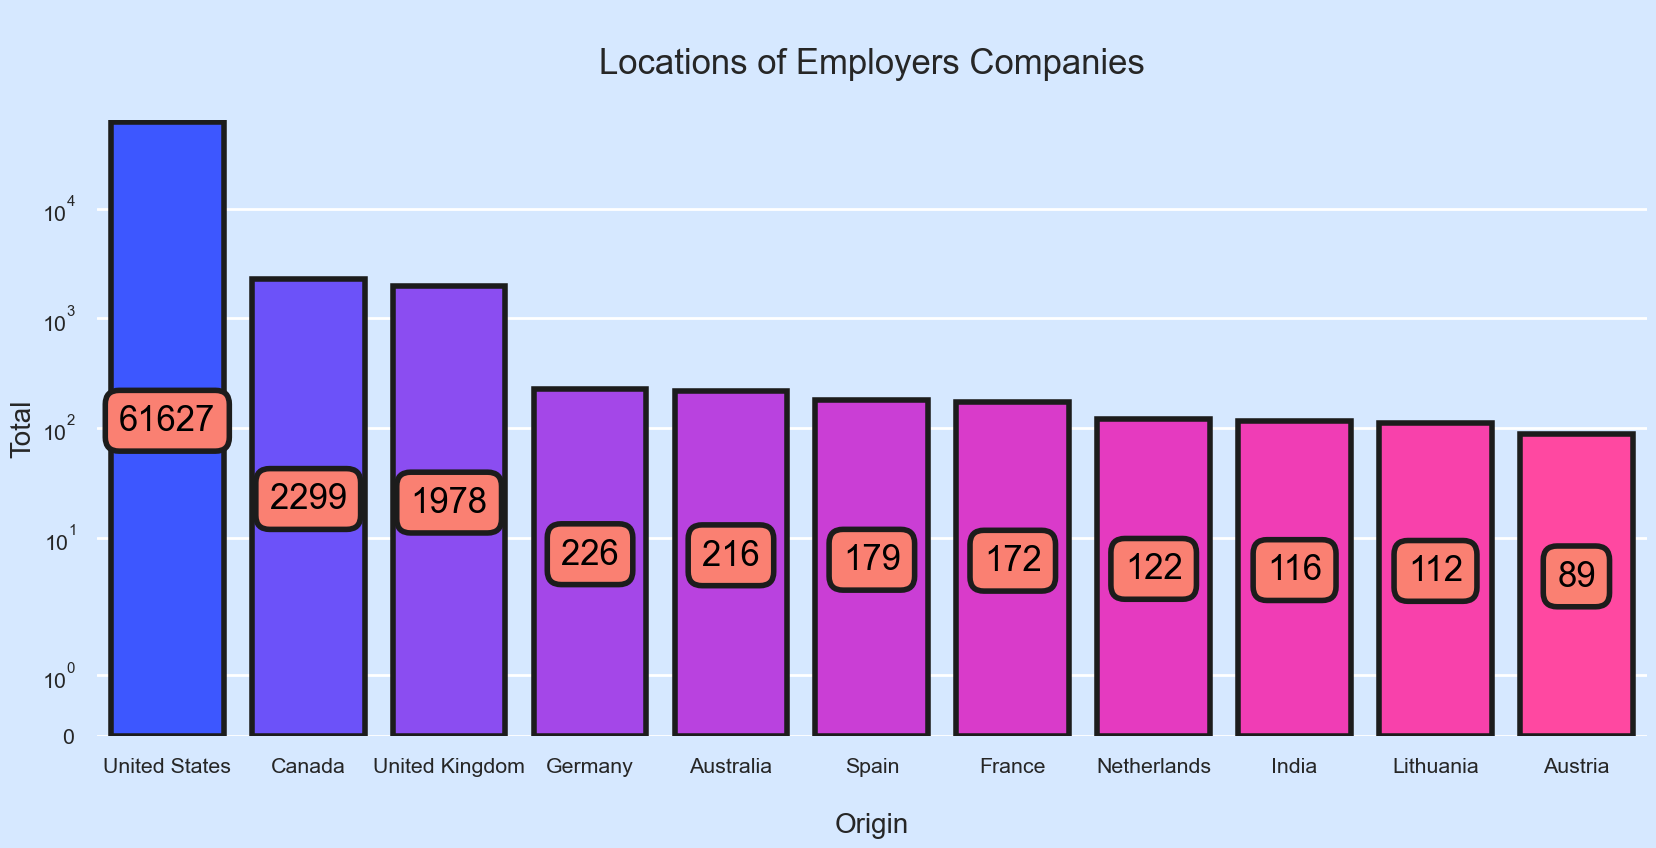

In [17]:
# Plot employers by their location
print("Let's have a look at the locations of the comapnies which data scientists listed as their employers (85 unique country names, 68182 total observations):")
plt.subplots(figsize=(20, 8))
p=sns.countplot(x=data["company_location"],order=data["company_location"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("symlog")
p.axes.set_title("\nLocations of Employers Companies\n",fontsize=25)
p.axes.set_xlabel("\nOrigin",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Conclusions:**

* **United States** hosts the greatest number of companies employing data scientists, followed by **Canada**, **United Kingdom** and **Germany**.

<a id="9"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Employee's Origins</p>

Let's have a look at the origins of the employees:


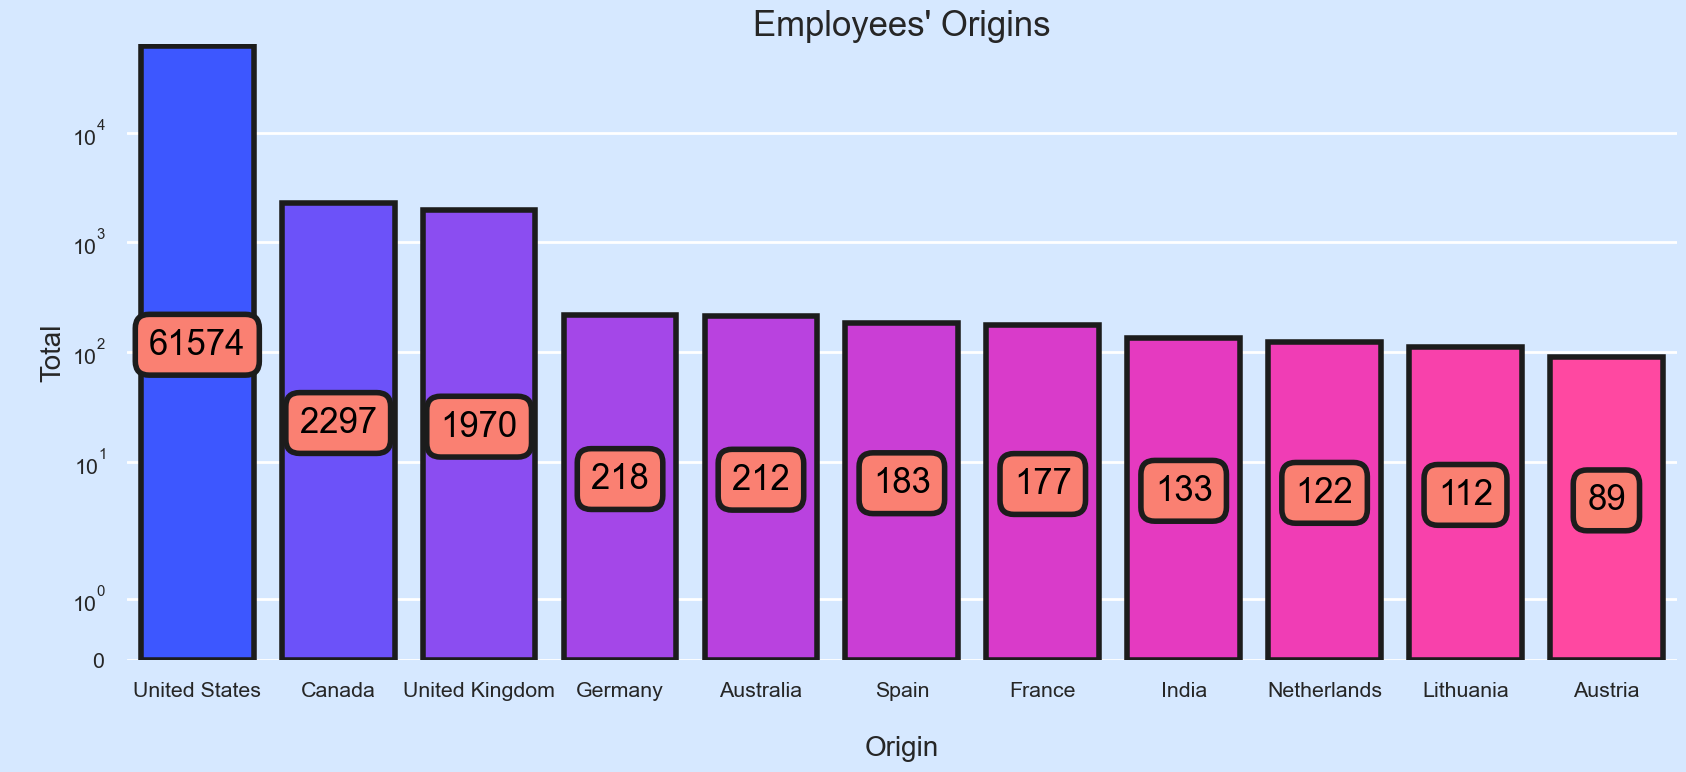

In [18]:
print("Let's have a look at the origins of the employees:")
plt.subplots(figsize=(20, 8))

p=sns.countplot(x=data["employee_residence"],order=data["employee_residence"].value_counts().index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("symlog")
p.axes.set_title("Employees' Origins",fontsize=25)
p.axes.set_ylabel("\nTotal",fontsize=20)
p.axes.set_xlabel("\nOrigin",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **United States** produces the biggest number of data scientist.
* The majority of the data scientists come from **North America** and **Europe**.

<a id="10"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Salary</p>

Let's have a look at the distribution of salaries:


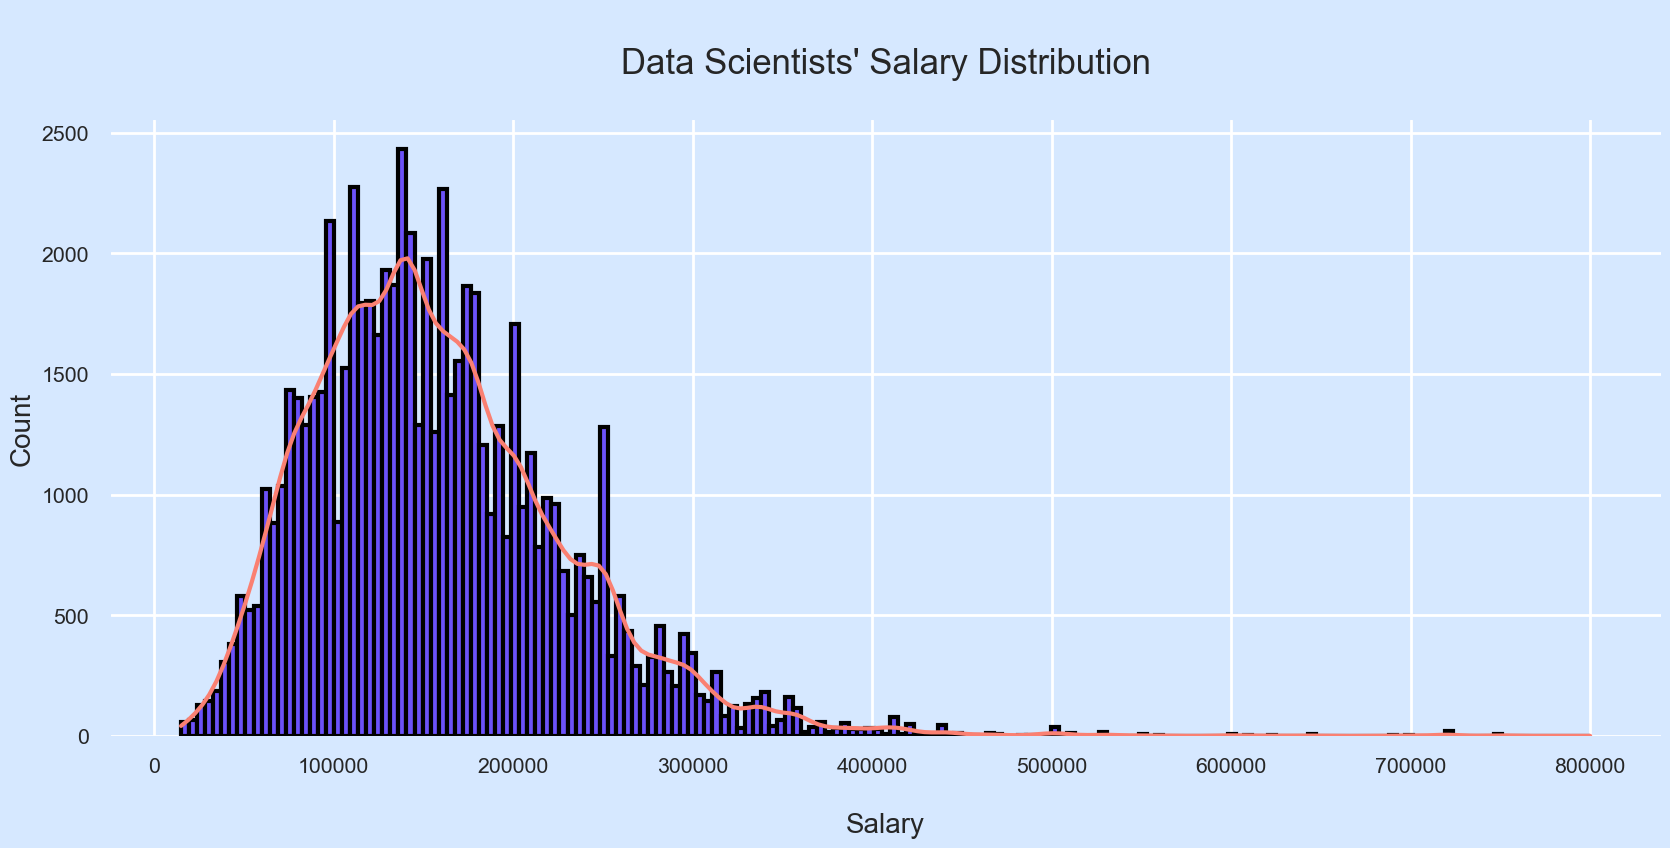

In [19]:
print(f"Let's have a look at the distribution of salaries:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["salary_in_usd"],color=palette[1],kde=True,bins="auto",alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("salmon")
p.axes.set_title("\nData Scientists' Salary Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSalary",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Conclusions:**

* The majority of data scientists' salaries fall between **$50,000** and **$150,000** per year.

Let's have a look at the highest paid positions:


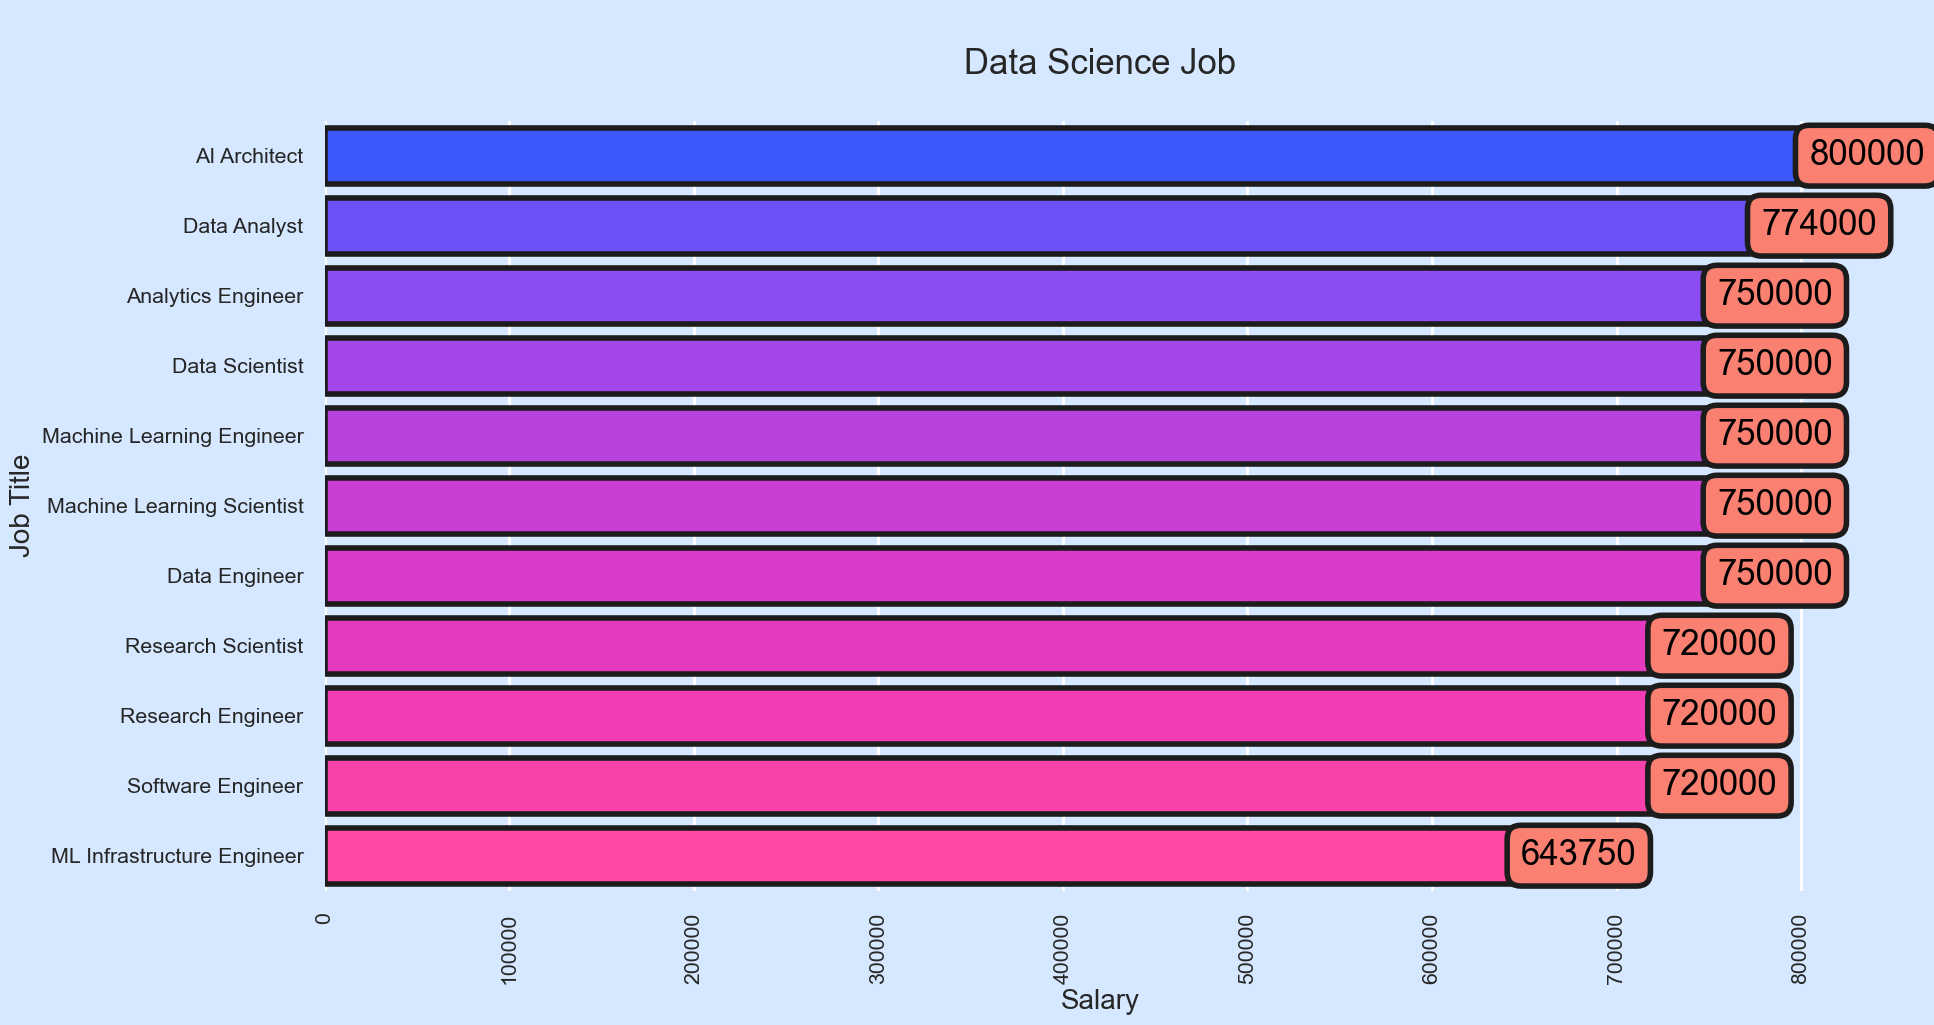

In [20]:
data_high = data.copy()
data_high = pd.DataFrame(data_high.groupby("job_title")["salary_in_usd"].max())

print("Let's have a look at the highest paid positions:")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_high.index,x=data_high["salary_in_usd"],order=data_high.sort_values("salary_in_usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Conclusions:**

* **Principal Data Engineer** is the highest paid job role followed by **Financial Data Analyst** and **Research Scientist**.


Let's have a look at the average pay across various job titles:


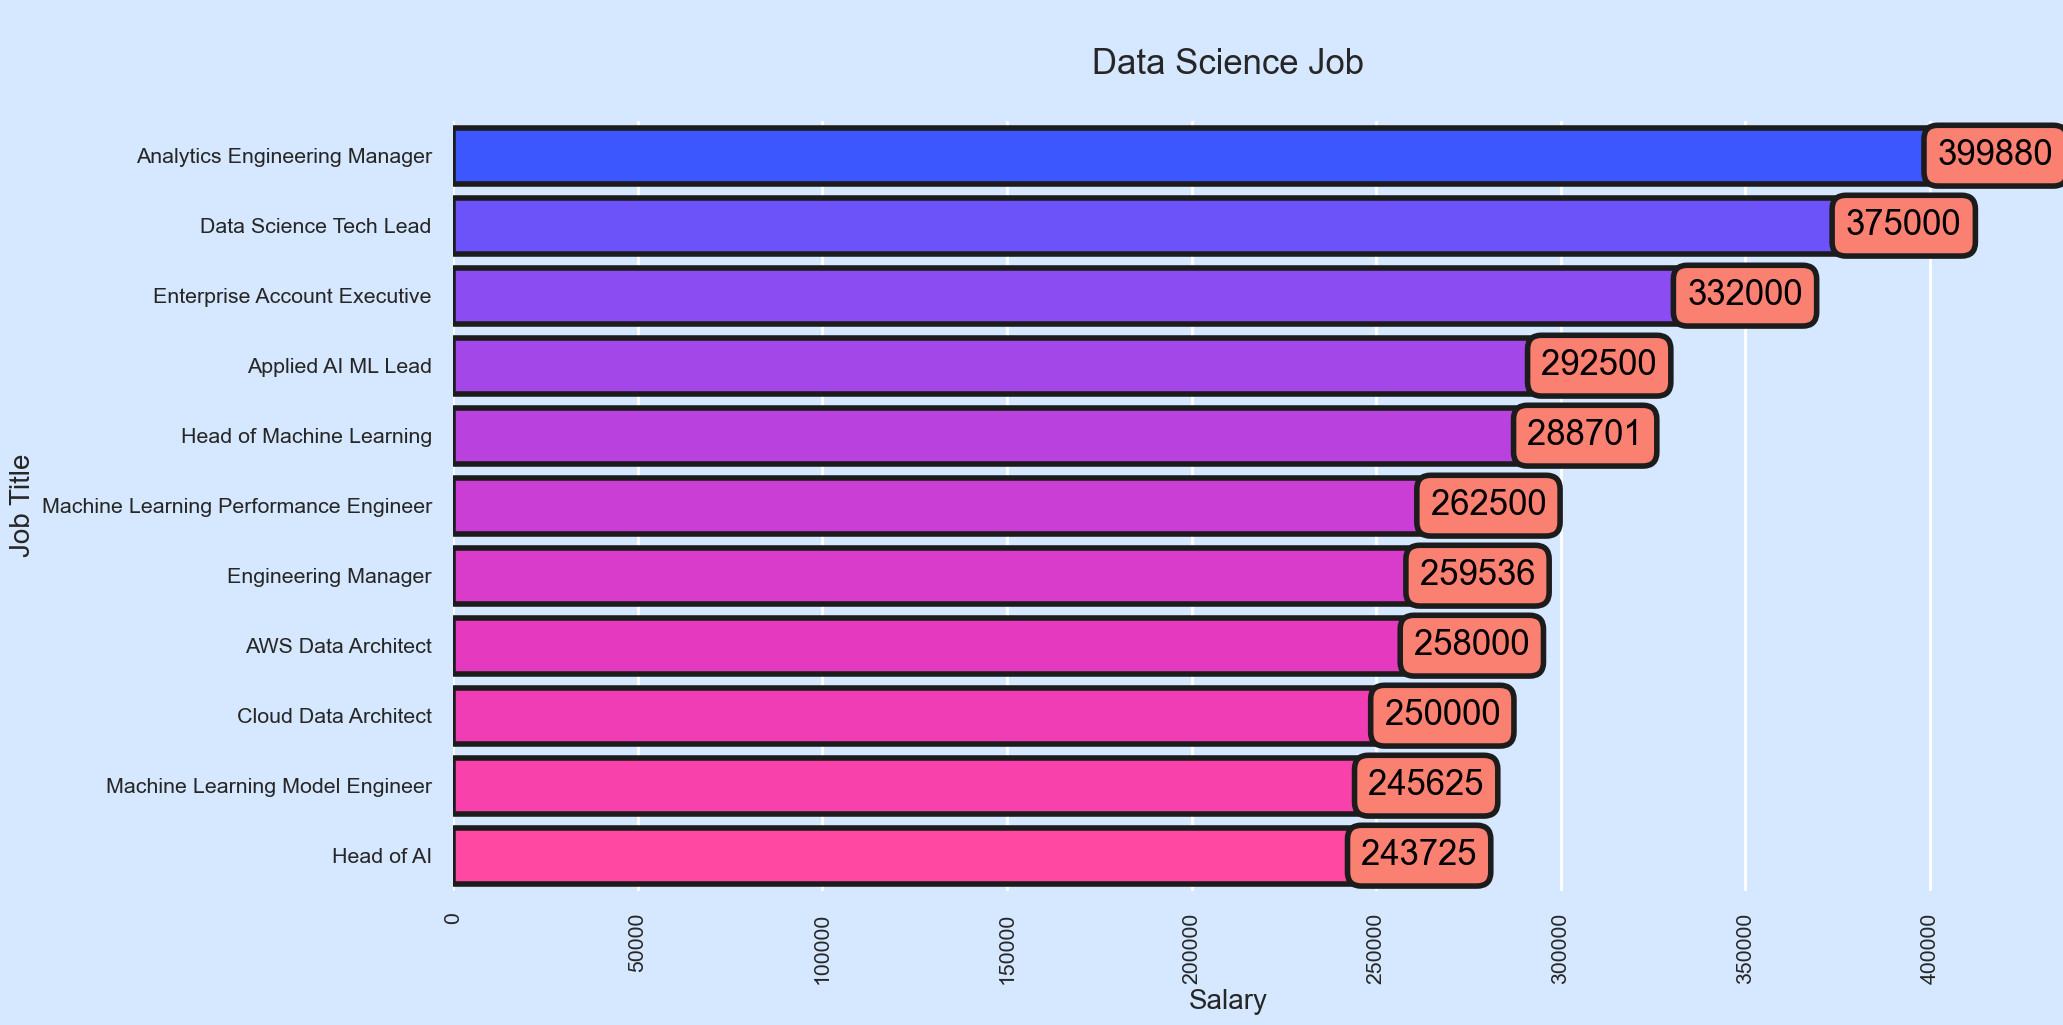

In [21]:
data_avg = data.copy()
data_avg = pd.DataFrame(data_avg.groupby("job_title")["salary_in_usd"].mean())

print("Let's have a look at the average pay across various job titles:")
plt.subplots(figsize=(20, 10))
p=sns.barplot(y=data_avg.index,x=data_avg["salary_in_usd"],order=data_avg.sort_values("salary_in_usd",ascending=False).index[:11],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nData Science Job\n",fontsize=25)
p.axes.set_xlabel("Salary",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Conclusions:**

* **Data Analytics Lead** is leading in average salary followed by **Principal Data Engineer**, **Financial Data Analyst** and others.
* Though someone got paid highly in **Principal Data Engineer** and **Financial Data Analyst** role but the average salary of this job role is not the highest one.


Let's have a look at the timeline of average salary :


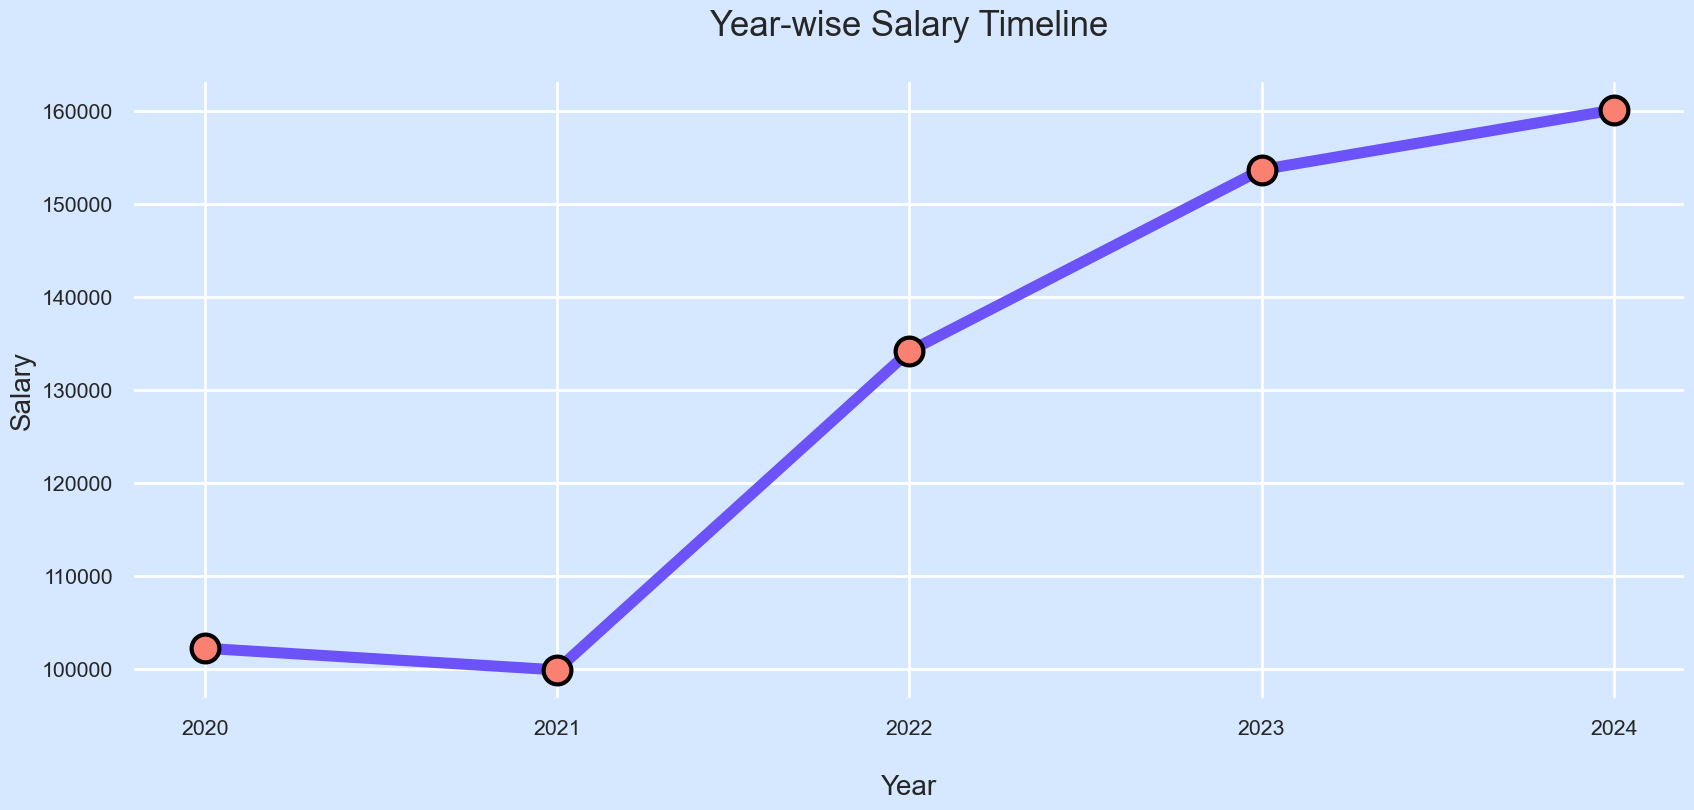

In [43]:
data_timeline = pd.DataFrame(data.groupby("work_year")["salary_in_usd"].mean())
data_timeline = data_timeline.reset_index()
data_timeline["work_year"] = data_timeline["work_year"].astype(str)

print(f"Let's have a look at the timeline of average salary :")
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=data_timeline["work_year"] ,y=data_timeline["salary_in_usd"],data=data_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="salmon",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("Year-wise Salary Timeline\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* We can see, data scintist's average salary is increasing by time.

<a id="11"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Experience Level</p>

Let's have a look at the ratio of experience level :


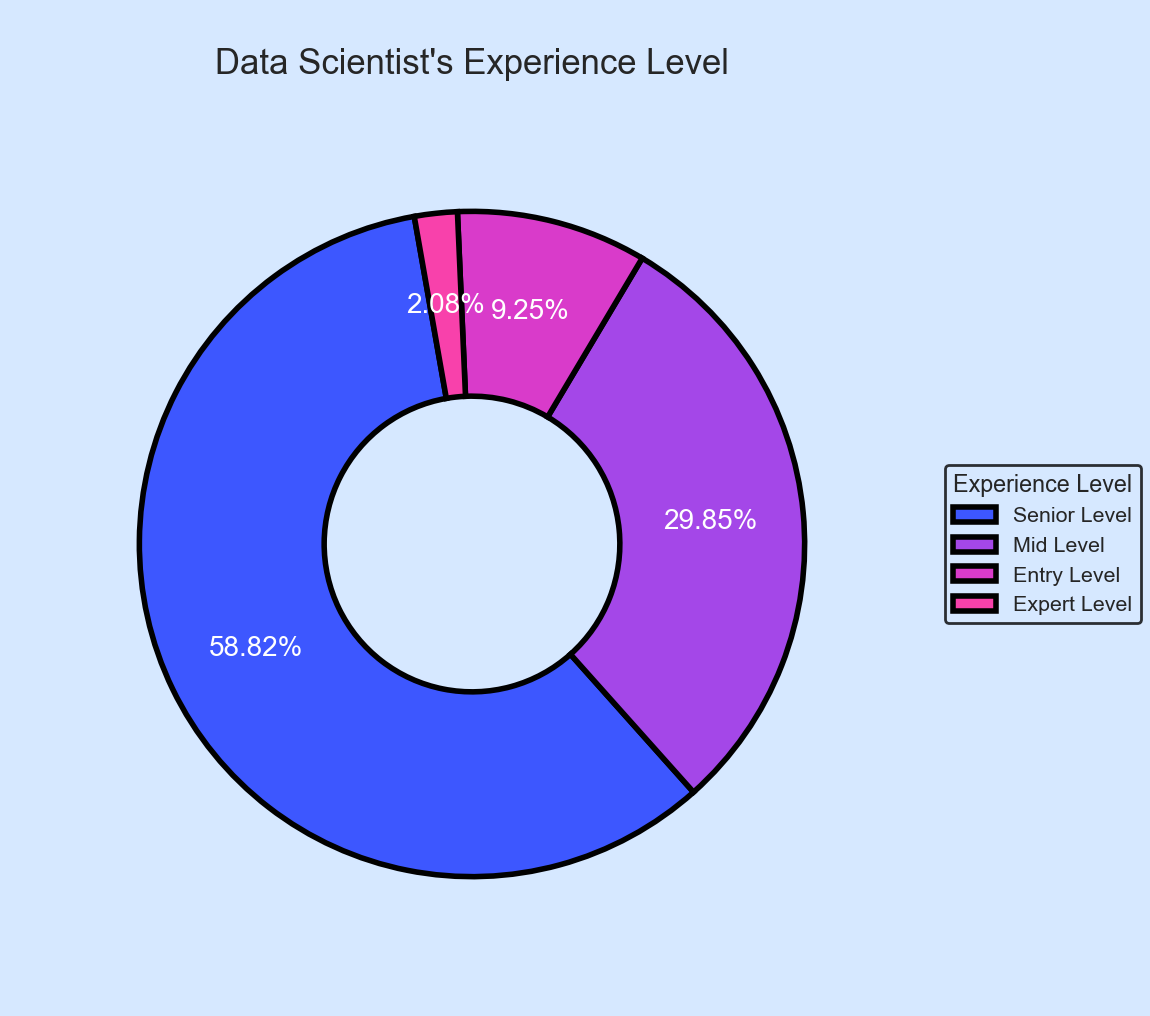

In [44]:
print(f"Let's have a look at the ratio of experience level :")
plt.subplots(figsize=(12, 12))

labels = "Senior Level","Mid Level","Entry Level","Expert Level"
size = 0.5

wedges, texts, autotexts = plt.pie([data["experience_level"].value_counts().values[0],
                                    data["experience_level"].value_counts().values[1],
                                    data["experience_level"].value_counts().values[2],
                                    data["experience_level"].value_counts().values[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:11:3], 
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Experience Level",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Experience Level",fontsize=25)
plt.show()

Let's have a look at the experience level :


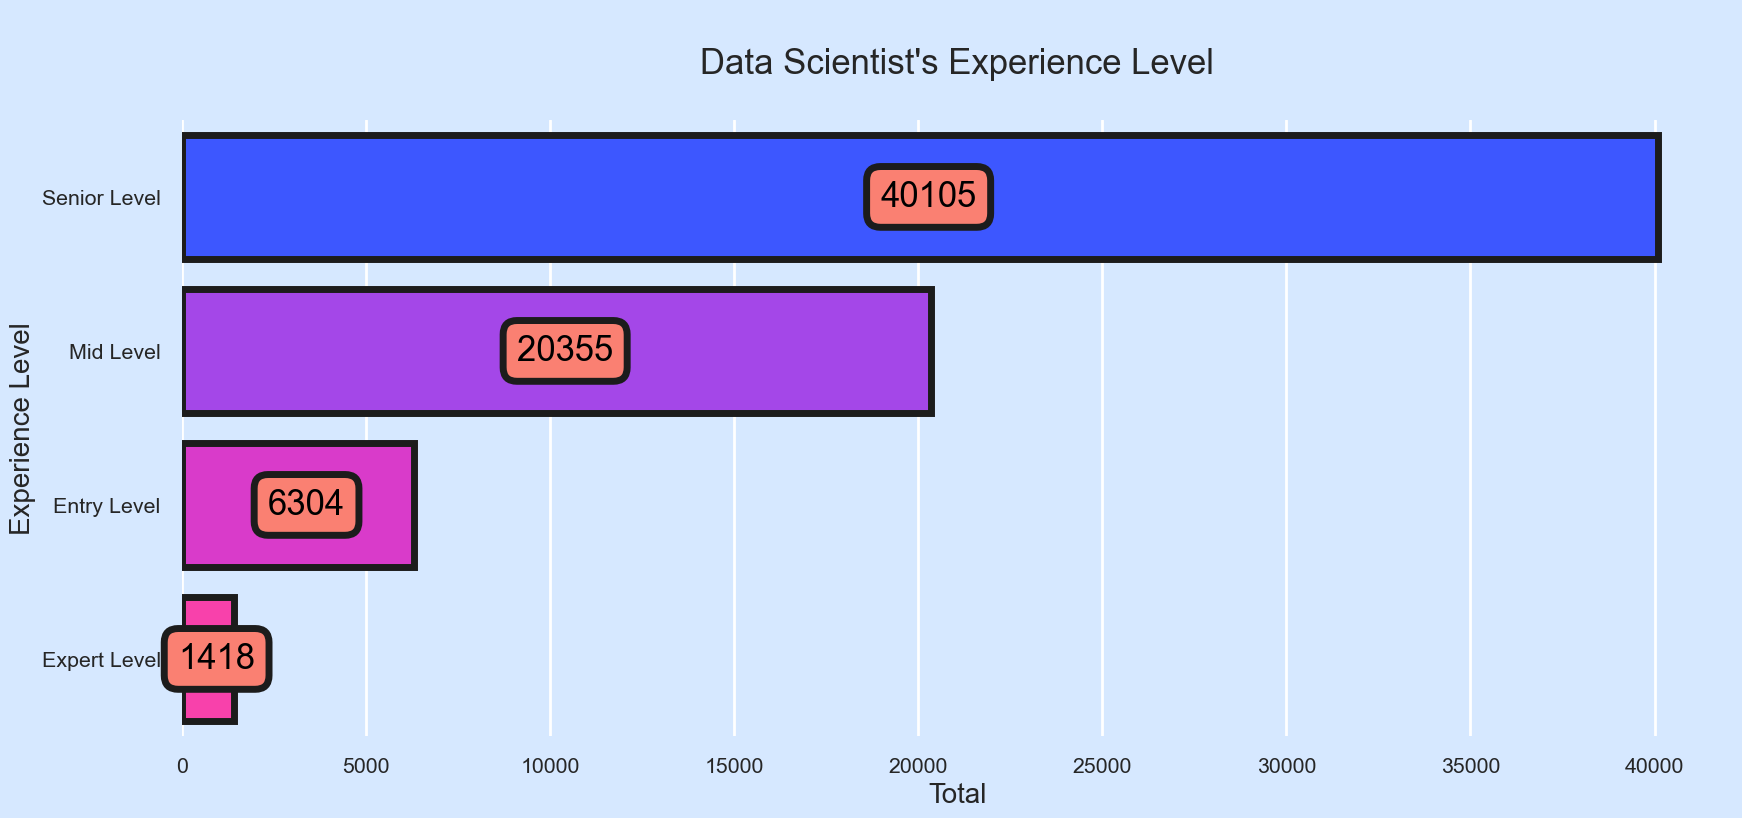

In [45]:
print("Let's have a look at the experience level :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["experience_level"],order=data["experience_level"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nData Scientist's Experience Level\n",fontsize=25)
p.axes.set_ylabel("Experience Level",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data scientists are in **Senior Level** with a ratio of **46.13%** followed by **Mid Level** and **Entry Level**
* Only few are in **Expert Level** with a ratio of **4.28%**.

Let's have a look at the salary distribution of experience level :


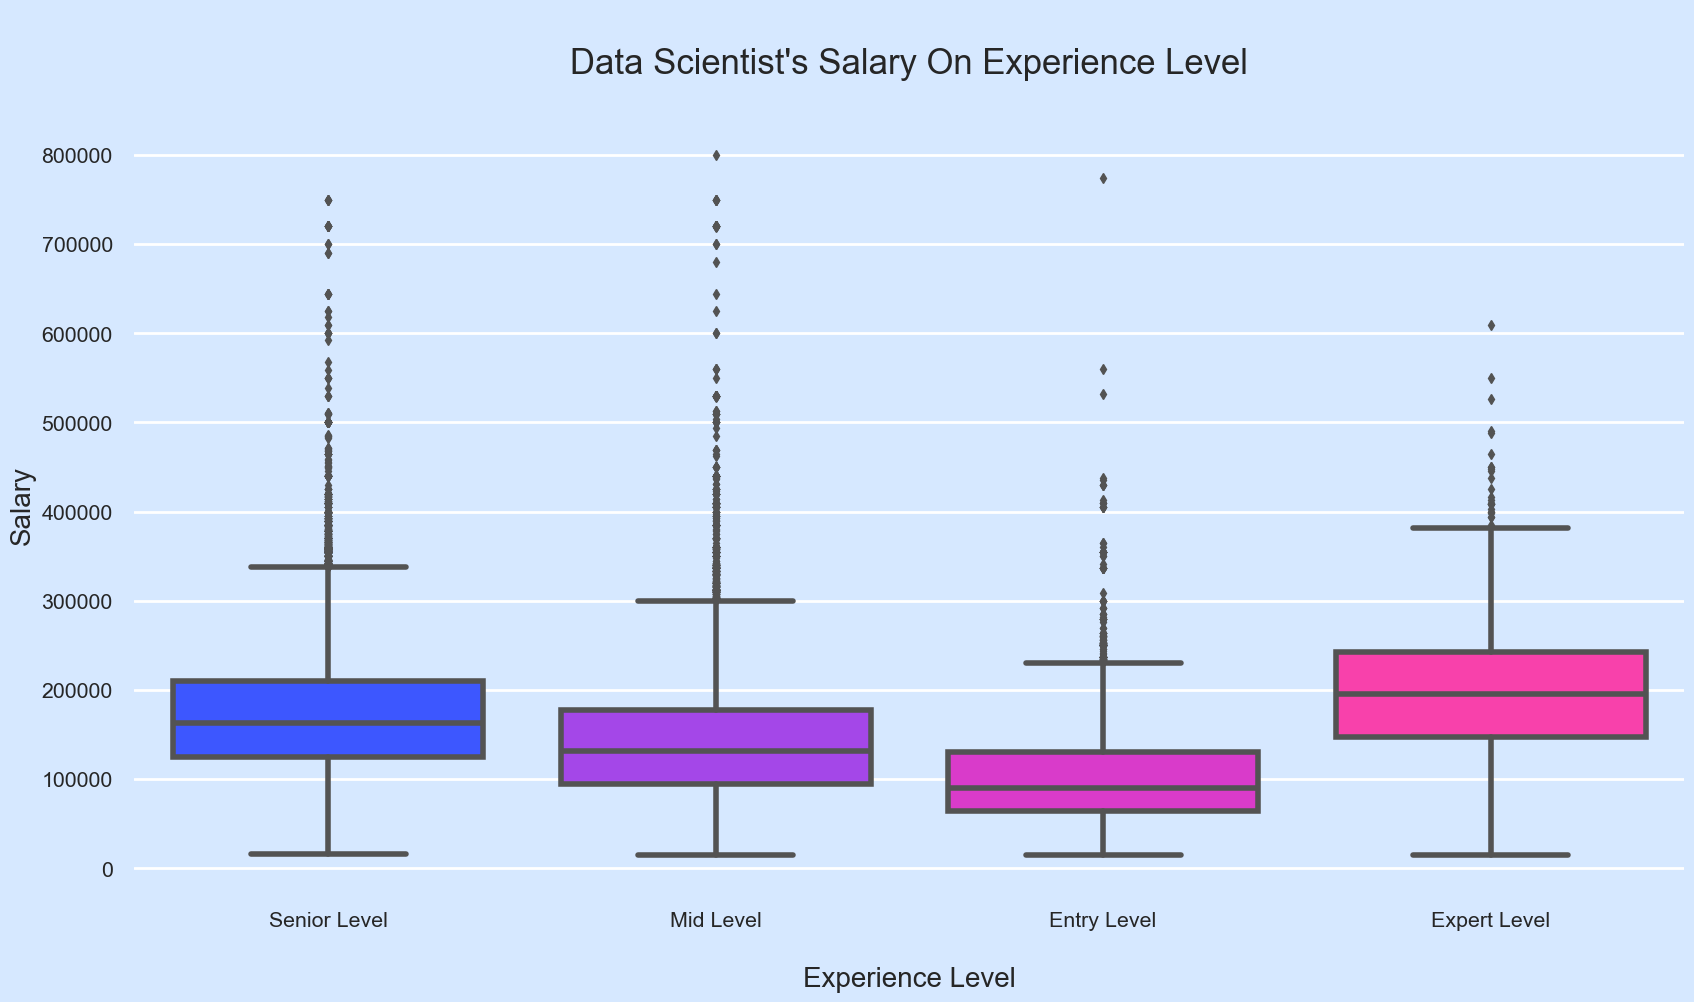

In [46]:
print("Let's have a look at the salary distribution of experience level :")
plt.subplots(figsize=(20, 10))

p=sns.boxplot(x=data["experience_level"],y=data["salary_in_usd"],order=data["experience_level"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4)
p.axes.set_title("\nData Scientist's Salary On Experience Level\n",fontsize=25)
p.axes.set_xlabel("\nExperience Level",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Expert Level** earns highest of others. Also their earning range is higher than others.
* Most of the **Senior Level** guys earn in between **100000** to **140000**
* Most of the **Mid Level** guys earn in between **60000** to **80000**
* Most of the **Entry Level** guys earn in between **30000** to **50000**

<a id="12"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Employment Type</p>

Let's have a look at the employment type :


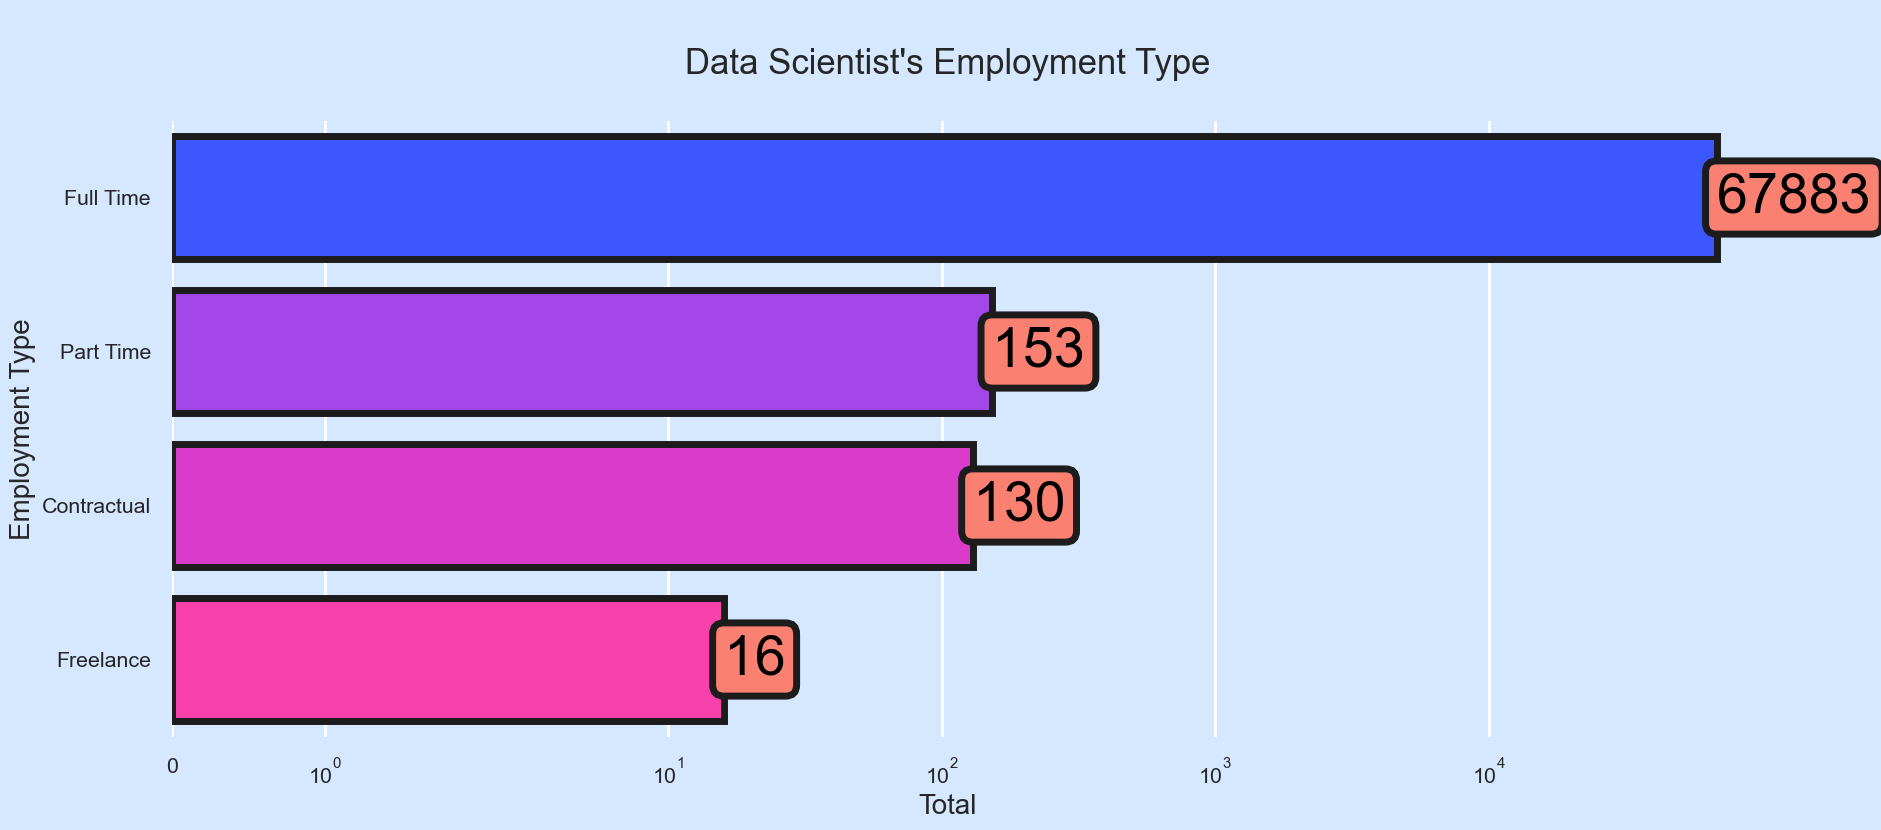

In [47]:
print("Let's have a look at the employment type :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["employment_type"],order=data["employment_type"].value_counts().index,palette=palette[0:11:3], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("symlog")
p.axes.set_title("\nData Scientist's Employment Type\n",fontsize=25)
p.axes.set_ylabel("Employment Type",fontsize=20)
p.axes.set_xlabel("Total",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=0,size=40,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data scientist's employment types are **Full Time** followed by **Part Time** and **Contractual**
* Only a few are **Freelancer**.

Let's have a look at the salary distribution of employment type :


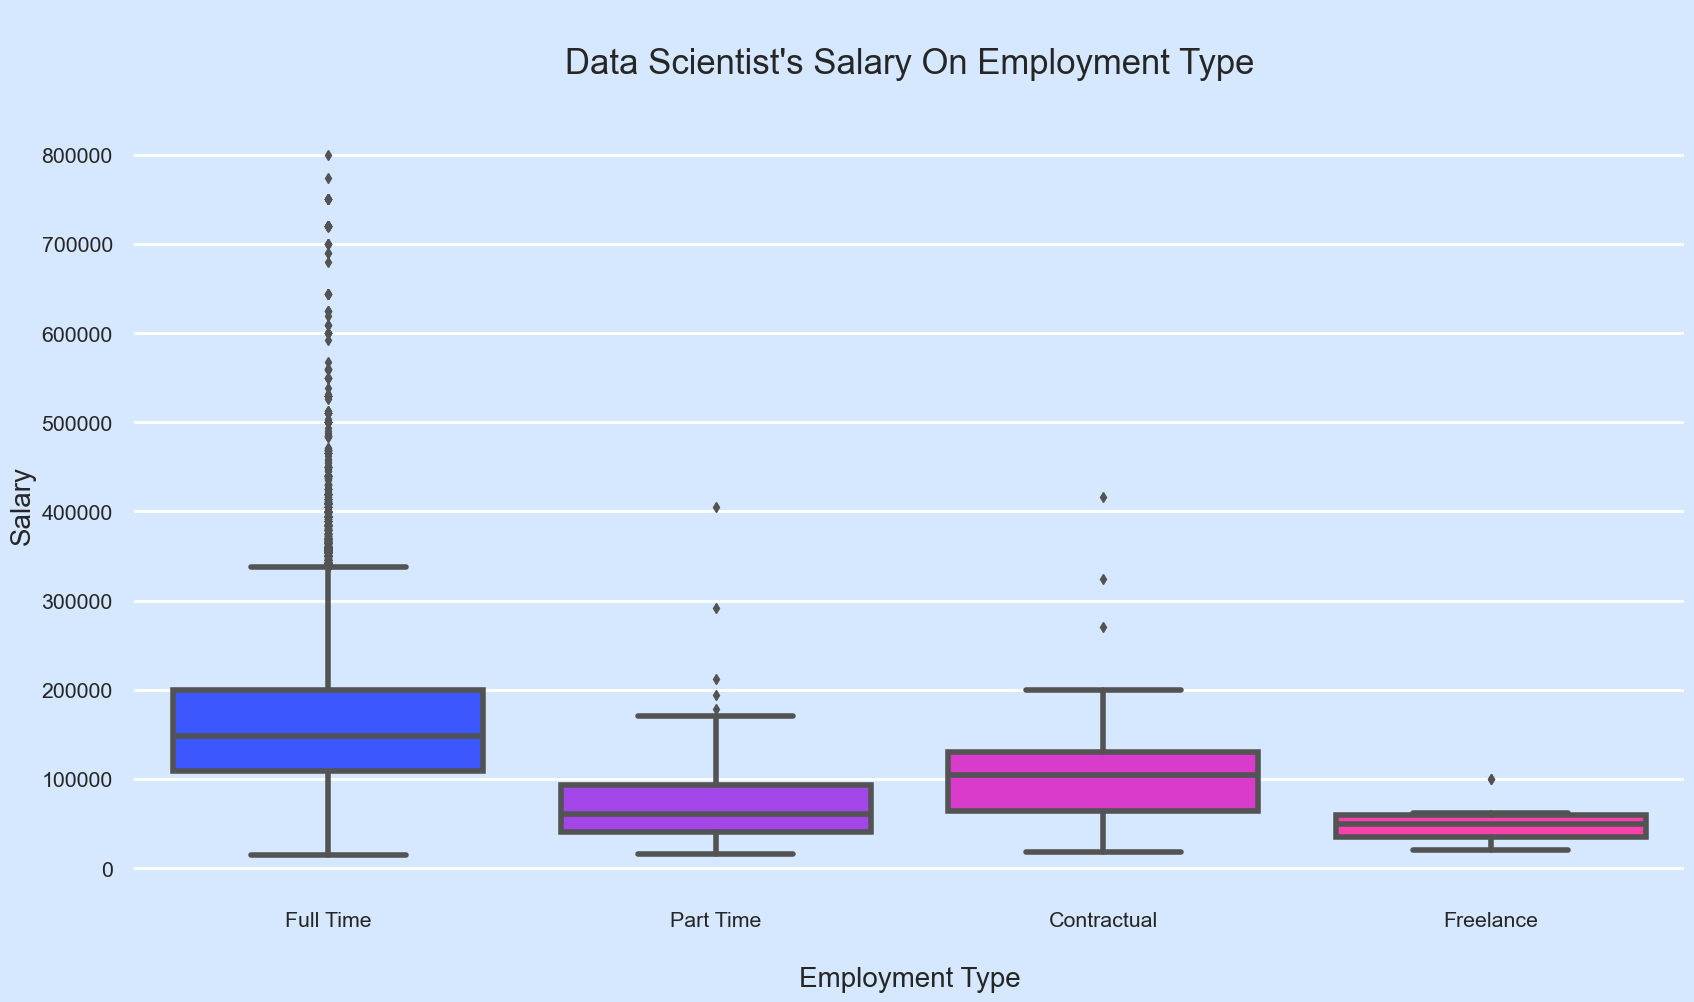

In [48]:
print("Let's have a look at the salary distribution of employment type :")
plt.subplots(figsize=(20, 10))

p=sns.boxplot(x=data["employment_type"],y=data["salary_in_usd"],order=data["employment_type"].value_counts().index,palette=palette[0:11:3],saturation=1,linewidth=4)
p.axes.set_title("\nData Scientist's Salary On Employment Type\n",fontsize=25)
p.axes.set_xlabel("\nEmployment Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Contractual** job holders earn as much as **Full Time** job holders. 
* Most of the **Full Time** job holders earn in between **80000** to **110000**
* Most of the **Part Time** job holders earn in between **10000** to **30000**
* Most of the **Freelancers** earn in between **20000** to **50000**

<a id="13"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Company Size</p>

Let's have a look at the ratio of company sizes :


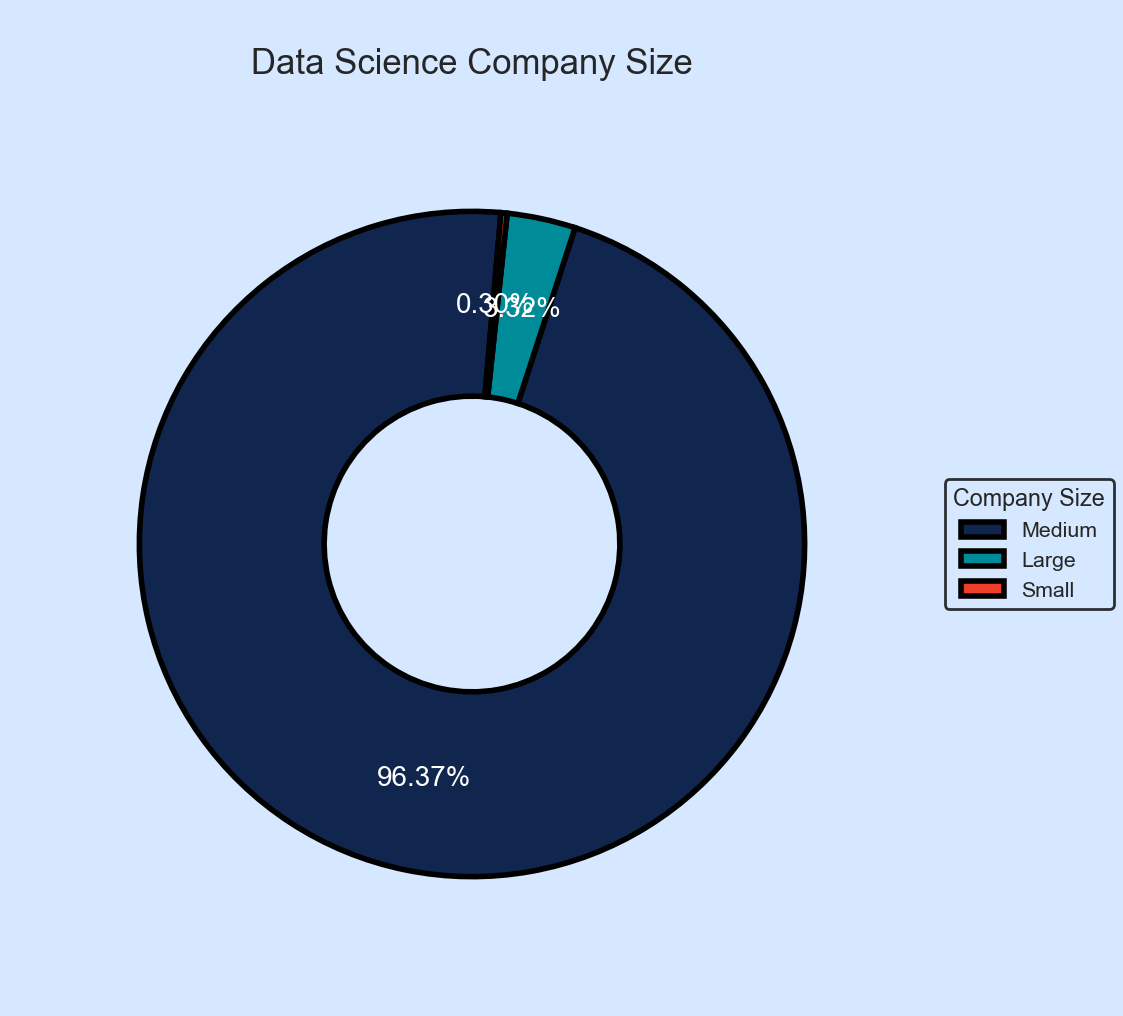

In [49]:
print(f"Let's have a look at the ratio of company sizes :")
plt.subplots(figsize=(12, 12))

labels = "Medium","Large","Small"
size = 0.5

wedges, texts, autotexts = plt.pie([data["company_size"].value_counts().values[0],
                                    data["company_size"].value_counts().values[1],
                                    data["company_size"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#008b99","#ef3f28"], 
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 85)

plt.legend(wedges, labels, title="Company Size",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Science Company Size",fontsize=25)
plt.show()

Let's have a look at the company size :


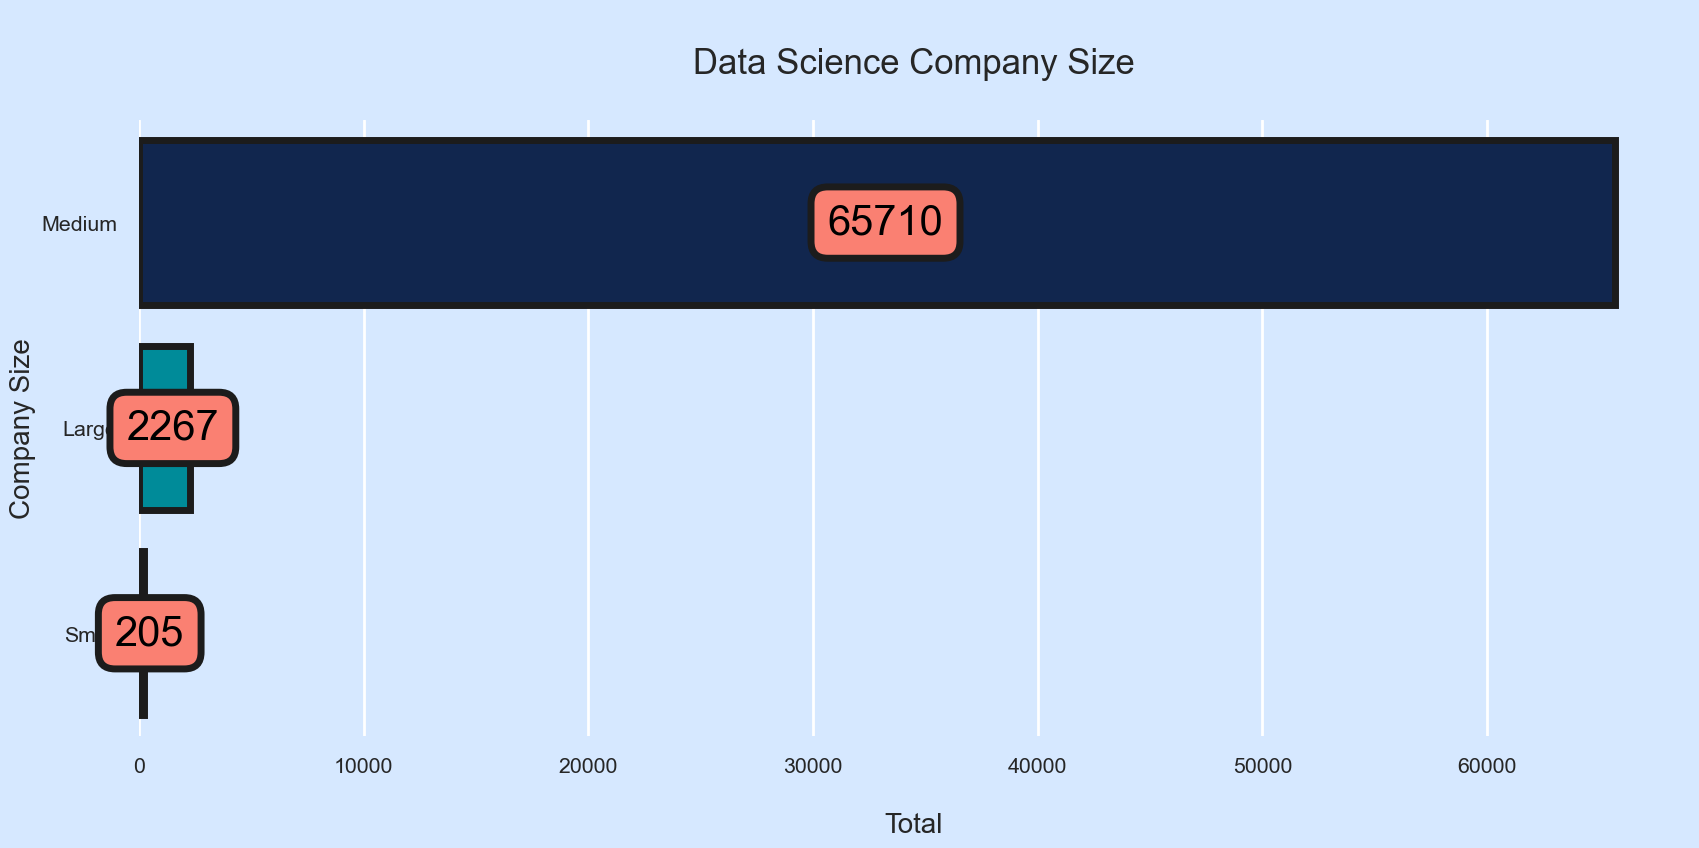

In [50]:
print("Let's have a look at the company size :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["company_size"],order=data["company_size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("linear")
p.axes.set_title("\nData Science Company Size\n",fontsize=25)
p.axes.set_ylabel("Company Size",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data science companies are **Medium** with a ratio of **53.71%** followed by **Large** companies with a ratio of **32.62%**.
* Only a few are **Small** with a ratio of **13.67%**.

Let's have a look at the salary distribution of company size :


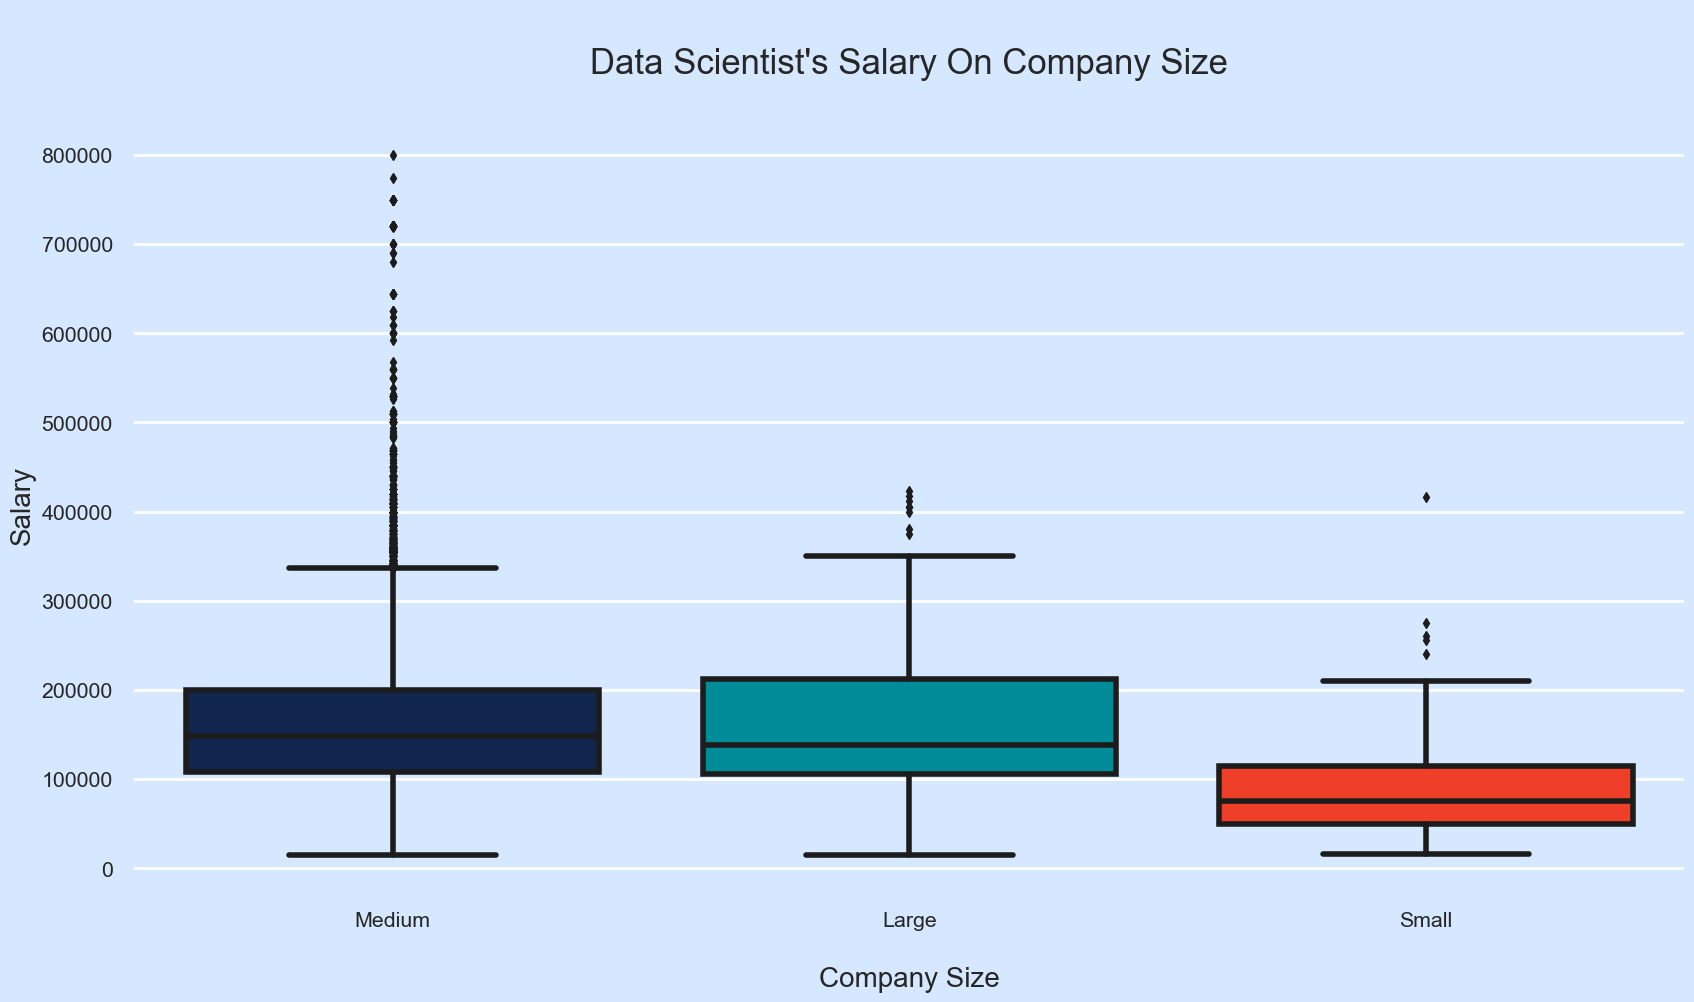

In [51]:
print("Let's have a look at the salary distribution of company size :")
plt.subplots(figsize=(20, 10))

p=sns.boxplot(x=data["company_size"],y=data["salary_in_usd"],order=data["company_size"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4)
p.axes.set_title("\nData Scientist's Salary On Company Size\n",fontsize=25)
p.axes.set_xlabel("\nCompany Size",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Large** companies earn highest than others. 
* Most of the **Medium** company's job holders earn in between **90000** to **120000**
* Most of the **Large** company's job holders earn in between **70000** to **90000**
* Most of the **Small** company's job holders earn in between **60000** to **80000**

<a id="14"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Remote Job</p>

Let's have a look at the ratio of job types :


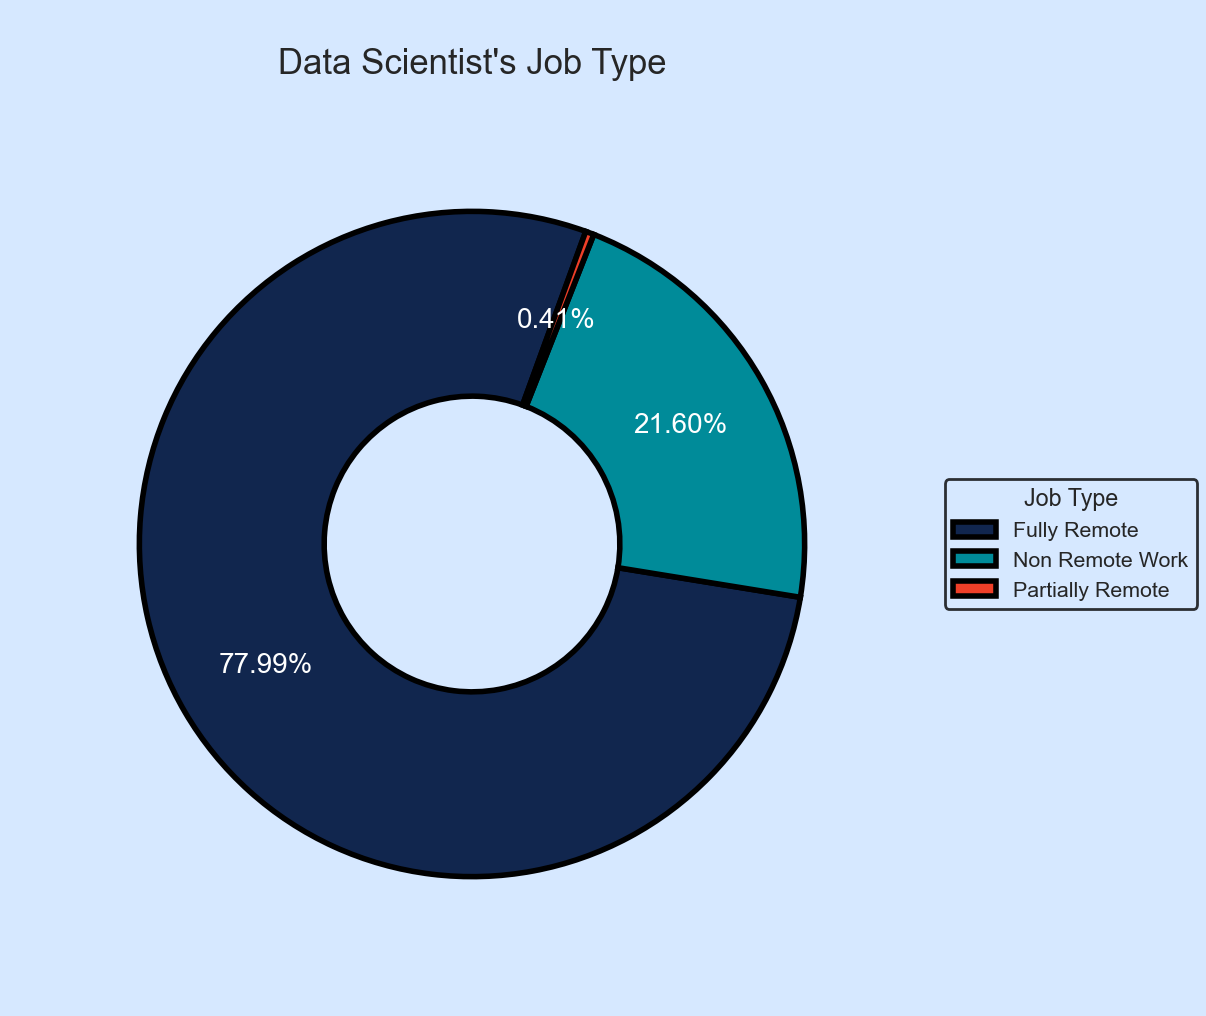

In [52]:
print(f"Let's have a look at the ratio of job types :")
plt.subplots(figsize=(12, 12))

labels = "Fully Remote","Non Remote Work","Partially Remote"
size = 0.5

wedges, texts, autotexts = plt.pie([data["remote_ratio"].value_counts().values[0],
                                    data["remote_ratio"].value_counts().values[1],
                                    data["remote_ratio"].value_counts().values[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#11264e","#008b99","#ef3f28"], 
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 70)

plt.legend(wedges, labels, title="Job Type",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nData Scientist's Job Type",fontsize=25)
plt.show()

Let's have a look at the job types :


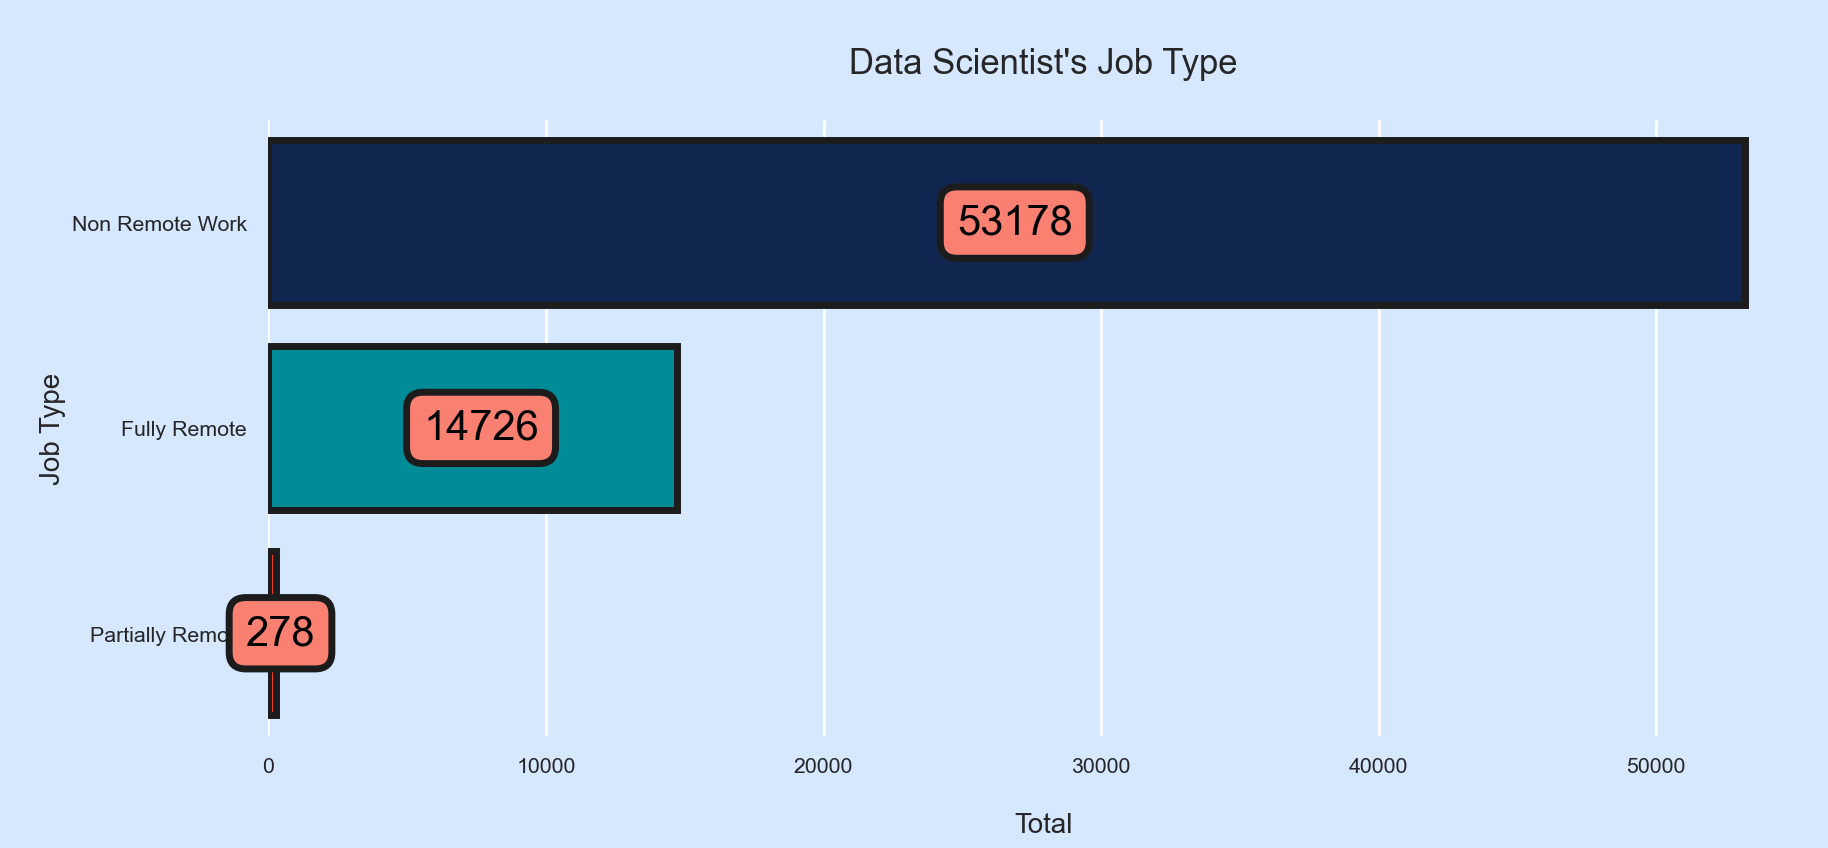

In [54]:
print("Let's have a look at the job types :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["remote_ratio"],order=data["remote_ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_xscale("linear")
p.axes.set_title("\nData Scientist's Job Type\n",fontsize=25)
p.axes.set_ylabel("\nJob Type",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "salmon", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the data science companies provide **Fully Remote** jobs with a ratio of **62.77%** followed by **Non Remote** jobs with a ratio of **20.92%**.
* Only a few are **Partially Remote** with a ratio of **16.31%**.

Let's have a look at the salary distribution of job types :


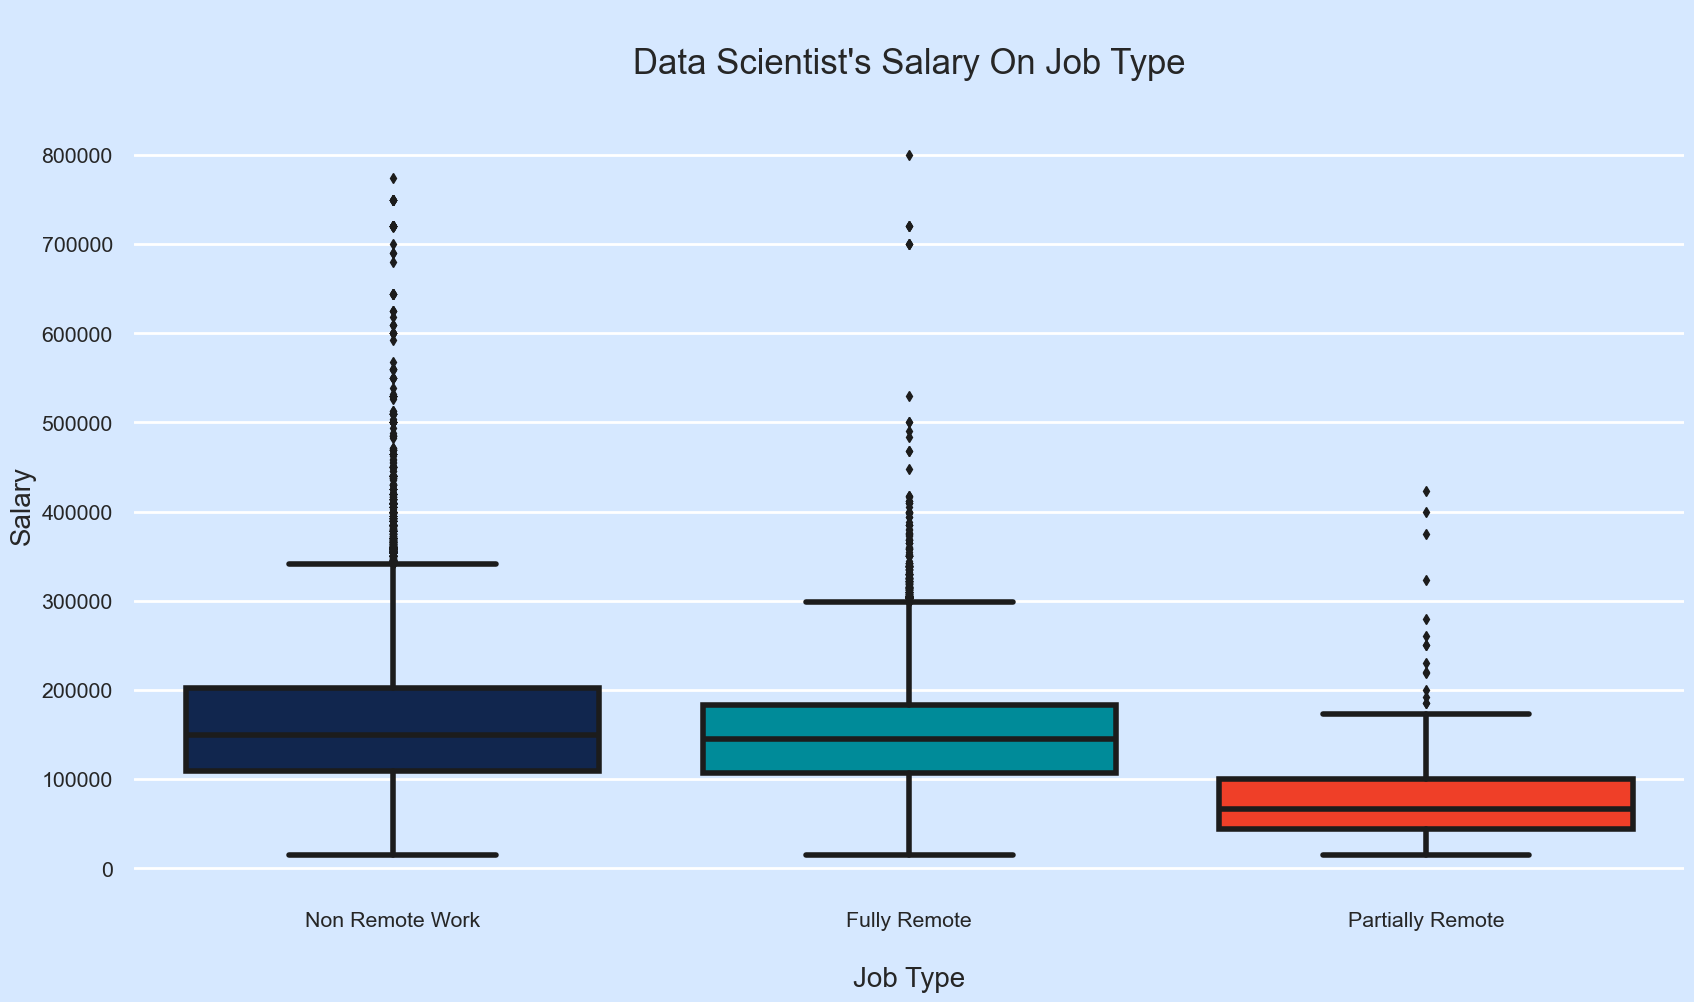

In [56]:
print("Let's have a look at the salary distribution of job types :")
plt.subplots(figsize=(20, 10))

p=sns.boxplot(x=data["remote_ratio"],y=data["salary_in_usd"],order=data["remote_ratio"].value_counts().index,palette=["#11264e","#008b99","#ef3f28"],saturation=1,linewidth=4)
p.axes.set_title("\nData Scientist's Salary On Job Type\n",fontsize=25)
p.axes.set_xlabel("\nJob Type",fontsize=20)
p.axes.set_ylabel("Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Some in **Fully Remote** jobs earn highest than others. 
* Most of the **Fully Remote** job holders earn in between **80000** to **150000**
* Most of the **Non Remote** job holders earn in between **70000** to **110000**
* Most of the **Partially remote** job holders earn in between **60000** to **80000**

<a id="15"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

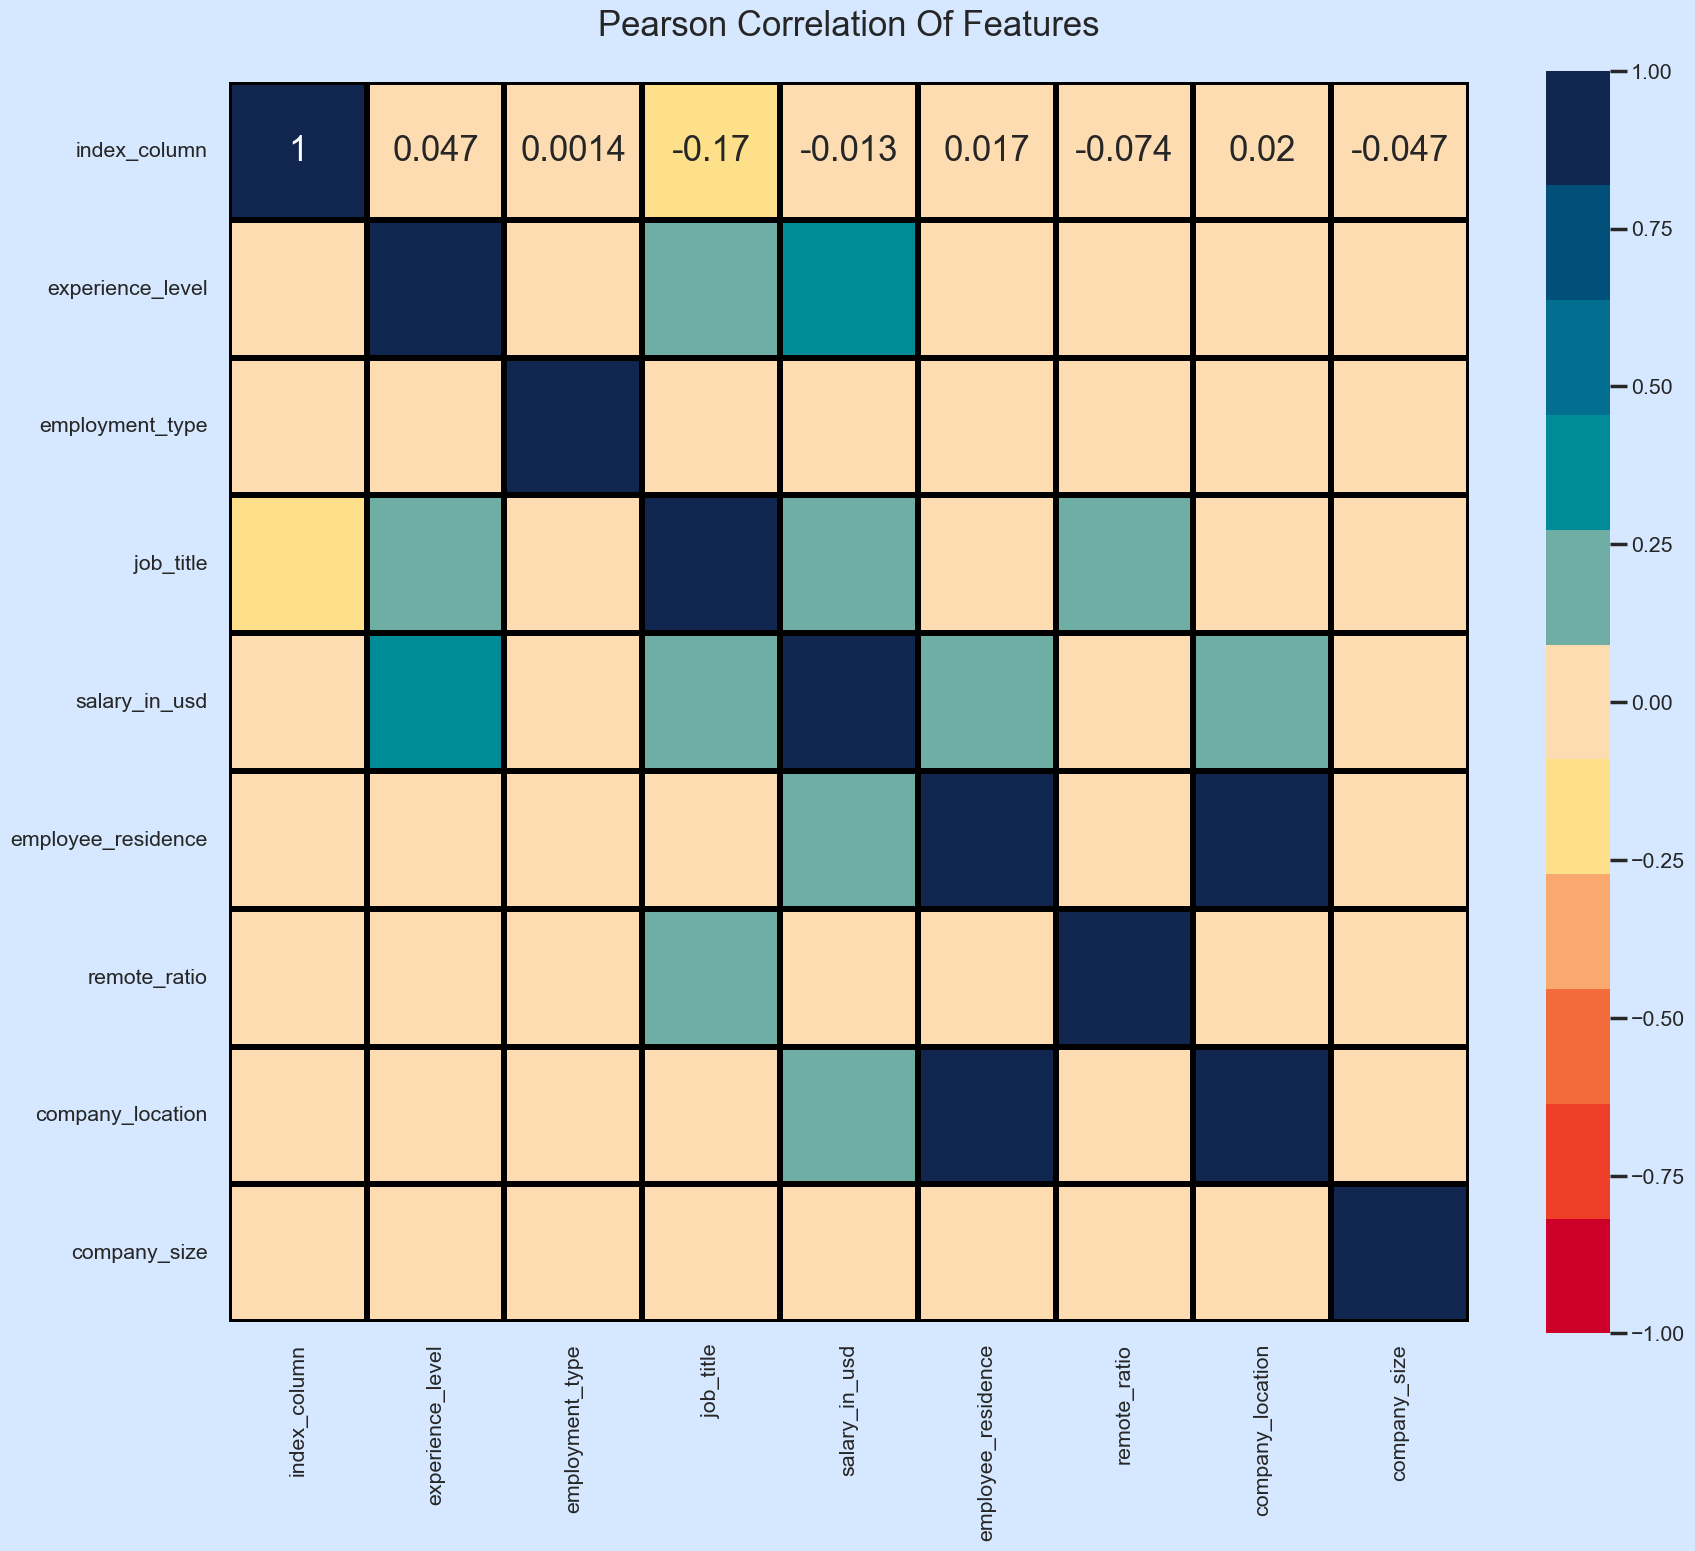

In [ ]:
catcol = ["experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop("work_year",axis=1).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82), 
        annot=True, vmin=-1, vmax=1, linewidths=4,linecolor='black',annot_kws=dict(fontsize =25))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

**Insights:**

* High correlation between employee residence and company location. 
* Medium correlation between salary in usd and experience level, salary in usd and company location, salary in usd and employee residence.

<a id="16"></a>
# <p style="padding:10px;background-color:#40a3ff;margin:0;color:#ffffff;font-family:helvetica;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Creation</p>